#### Import the libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [132]:
df = pd.read_csv('HousePrices.csv')
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm          1Fam     2Story            7            5   
1      Feedr       Norm          1Fam     1Story            6            8   
2       Norm       Norm          1Fam     2Story            7            5   
3       Norm       Norm          1Fam     2Story            7            5   
4       Norm       Norm          1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ 

In [133]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

#### Shape

In [134]:
df.shape      # rows = 2073, cols=81

(2073, 81)

### Data Cleaning

#### 1) Handling null values

In [135]:
# nv = null value
nv = df.isnull().sum()
nv = nv[nv>0]
print(type(nv))
nv

<class 'pandas.core.series.Series'>


LotFrontage      320
Alley           1944
MasVnrType        14
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
PoolQC          2065
Fence           1669
MiscFeature     1993
dtype: int64

In [136]:
print(nv.index)
print(nv.values)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
[ 320 1944   14   14   59   59   61   59   60    1  988  113  113  113
  113  113 2065 1669 1993]


In [137]:
def null_df(data):
    nv = data.isnull().sum()
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Val':nv.values,
                          'Per_Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [138]:
nv_df = null_df(df)
nv_df.head(20)

Feature  Null_Val   Per_Null
72        PoolQC      2065  99.614086
74   MiscFeature      1993  96.140859
6          Alley      1944  93.777135
73         Fence      1669  80.511336
57   FireplaceQu       988  47.660396
3    LotFrontage       320  15.436565
59   GarageYrBlt       113   5.451037
64    GarageCond       113   5.451037
58    GarageType       113   5.451037
60  GarageFinish       113   5.451037
63    GarageQual       113   5.451037
32  BsmtExposure        61   2.942595
35  BsmtFinType2        60   2.894356
30      BsmtQual        59   2.846117
31      BsmtCond        59   2.846117
33  BsmtFinType1        59   2.846117
26    MasVnrArea        14   0.675350
25    MasVnrType        14   0.675350
42    Electrical         1   0.048239
0             Id         0   0.000000

In [139]:
# Handling NV - Null Values
# 1) Drop the column
# 2) Drop the rows containing null values
# 3) Fill the rows containing NV
# a) Con - mean, median, bfill, ffill
# b) Cat - mode, None, N/A

In [140]:
df1 = df.copy()

In [141]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

### Feature Significance using T-test

In [142]:
from scipy.stats import ttest_ind

In [143]:
df['Alley'].value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [144]:
a1 = df["Property_Sale_Price"][df['Alley']=='Grvl']
a2 = df["Property_Sale_Price"][df['Alley']=='Pave']
print(len(a1),len(a2))

72 57


In [145]:
# Ho : Mean of a1 = mean of a2 => 
# There is no significant difference between the mean Price of property wrt Grvl and Pavement
# H1 : Mean of a1 ≠ mean of a2 => 
# There is significant difference between the mean Price of property wrt Grvl and Pavement

test_stat,p = ttest_ind(a1,a2)
print('test_stat',test_stat)
print('p',p)
if p>0.05:
    print('Ho is True')
else:
    print('H1 is True')

test_stat -8.795678962194243
p 8.622117012118536e-15
H1 is True


In [146]:
# df['PoolQC'].value_counts()

In [147]:
for i in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
    df[i] = df[i].fillna('None')
    
nv = df.isnull().sum()
nv[nv>0]

LotFrontage     320
MasVnrType       14
MasVnrArea       14
BsmtQual         59
BsmtCond         59
BsmtExposure     61
BsmtFinType1     59
BsmtFinType2     60
Electrical        1
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [148]:
# BsmtQual         
# BsmtCond         
# BsmtExposure     
# BsmtFinType1     
# BsmtFinType2     

In [149]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    print(f'Feature : {i}')
    print(df[i].value_counts())
    print('-'*40) # For code separation

Feature : BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64
----------------------------------------
Feature : BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64
----------------------------------------
Feature : BsmtExposure
No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64
----------------------------------------
Feature : BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64
----------------------------------------
Feature : BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64
----------------------------------------


In [150]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[i] = df[i].fillna('None')

nv = df.isnull().sum()
nv[nv>0]

LotFrontage     320
MasVnrType       14
MasVnrArea       14
Electrical        1
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [151]:
# GarageType      
# GarageYrBlt     
# GarageFinish    
# GarageQual      
# GarageCond      

In [152]:
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    print(f'Feature : {i}')
    print(df[i].value_counts())
    print('-'*40) # For code separation

Feature : GarageType
Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64
----------------------------------------
Feature : GarageFinish
Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64
----------------------------------------
Feature : GarageQual
TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64
----------------------------------------
Feature : GarageCond
TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64
----------------------------------------


In [153]:
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[i] = df[i].fillna('None')
    
nv = df.isnull().sum()
nv[nv>0]

LotFrontage    320
MasVnrType      14
MasVnrArea      14
Electrical       1
GarageYrBlt    113
dtype: int64

In [154]:
# df['MasVnrArea'].value_counts()

In [155]:
df['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [156]:
df['MasVnrType'].fillna('None',inplace=True)

In [157]:
for i in ['MasVnrArea','LotFrontage']:
    df[i] = df[i].fillna(df[i].median())
    
nv = df.isnull().sum()
nv[nv>0]

Electrical       1
GarageYrBlt    113
dtype: int64

In [158]:
print(df['GarageYrBlt'].nunique())
df['GarageYrBlt'].value_counts()

102


2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
1977.0     57
2008.0     50
1999.0     45
1998.0     40
2002.0     38
1976.0     38
2000.0     37
1950.0     36
1962.0     36
1997.0     34
1966.0     33
1968.0     31
1993.0     31
2009.0     30
1994.0     30
1979.0     29
1965.0     29
1958.0     28
1970.0     27
1978.0     27
2001.0     26
1996.0     26
1963.0     26
1990.0     25
1956.0     25
1960.0     25
1995.0     24
1954.0     24
1957.0     24
1980.0     21
1974.0     21
1964.0     20
1967.0     20
1969.0     19
1940.0     18
1988.0     18
1972.0     18
1961.0     18
1959.0     18
1983.0     18
1991.0     17
1981.0     17
1971.0     17
1987.0     16
1973.0     15
1953.0     15
1985.0     15
1989.0     14
1992.0     14
1920.0     14
1955.0     14
1948.0     13
1941.0     13
1925.0     12
2010.0     10
1949.0     10
1951.0     10
1939.0      9
1984.0      9
1930.0      9
1936.0      9
1975.0      9
1986.0      8
1922.0      7
1945.0      7
1916.0      6
1926.0

In [159]:
print(df['GarageYrBlt'].mode()[0])
print(df['GarageYrBlt'].mode().max())

2005.0
2005.0


In [160]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

nv = df.isnull().sum()
nv[nv>0]

Electrical    1
dtype: int64

In [161]:
df.dropna(inplace=True)
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

#### 2) Handling Duplicate Rows

In [162]:
df.duplicated().sum()

13

In [163]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [164]:
df.shape
# rows = 2059, cols = 81

(2059, 81)

In [165]:
# df.columns
df.drop('Id',axis=1,inplace=True)
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [166]:
df.shape
# rows = 2059, cols = 80

(2059, 80)

### EDA - Exploratory Data Analysis

### 1) Univariate

In [167]:
df.describe()

Dwell_Type  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2059.000000  2059.000000    2059.000000  2059.000000  2059.000000   
mean     60.569694    71.735794   10731.351627     6.238465     5.837300   
std     160.434497    25.752506    9241.752913     1.519218     1.363215   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7636.000000     5.000000     5.000000   
50%      50.000000    70.000000    9497.000000     6.000000     5.000000   
75%      70.000000    80.000000   11611.000000     7.000000     7.000000   
max    7080.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2059.000000   2059.000000  2059.000000  2059.000000  2059.000000   
mean   1969.382710   1986.652258   101.585236   438.789218    49.413307   
std      30.236792     20.405665   179.131049   448.736658   166.052884   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1950.000000   1970.000000     0.000000     0.000000     0.000000   
50%    1971.000000   1995.000000     0.000000   383.000000     0.000000   
75%    1999.000000   2004.000000   160.500000   712.500000     0.000000   
max    2010.000000   2023.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2059.000000  2059.000000  2059.000000  2059.000000   2059.000000   
mean    565.541039  1053.743565  1167.211268   344.339000      6.210296   
std     450.581980   431.256522   377.466655   438.902516     49.719612   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     208.000000   795.000000   894.000000     0.000000      0.000000   
50%     466.000000   990.000000  1095.000000     0.000000      0.000000   
75%     807.000000  1297.500000  1392.000000   729.500000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  2059.000000   2059.000000   2059.000000  2059.000000  2059.000000   
mean   1517.760563      0.431277      0.056824     1.571151     0.378339   
std     518.062736      0.523048      0.237774     0.546357     0.499890   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1470.000000      0.000000      0.000000     2.000000     0.000000   
75%    1792.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   2059.000000   2059.000000   2059.000000  2059.000000  2059.000000   
mean       2.872268      1.051481      6.538125     0.605148  1981.778048   
std        0.816320      0.235918      1.627891     0.634291    24.126041   
min        0.000000      0.000000      2.000000     0.000000  1906.000000   
25%        2.000000      1.000000      5.000000     0.000000  1964.000000   
50%        3.000000      1.000000      6.000000     1.000000  1988.000000   
75%        3.000000      1.000000      7.000000     1.000000  2004.000000   
max        8.000000      3.000000     14.000000     3.000000  2019.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2059.000000  2059.000000  2059.000000  2059.000000    2059.000000   
mean      1.776105   474.869354    94.608062    46.136474      21.038854   
std       0.742891   212.562232   129.324869    64.779594      59.633750   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   336.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    67.500000   

In [168]:
df.dtypes

Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExposure            object
BsmtFinT

In [169]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'Bedro

In [170]:
# Univaraite EDA 
# num - dist plot, histogram, boxplot
# cat - countplot, pie chart

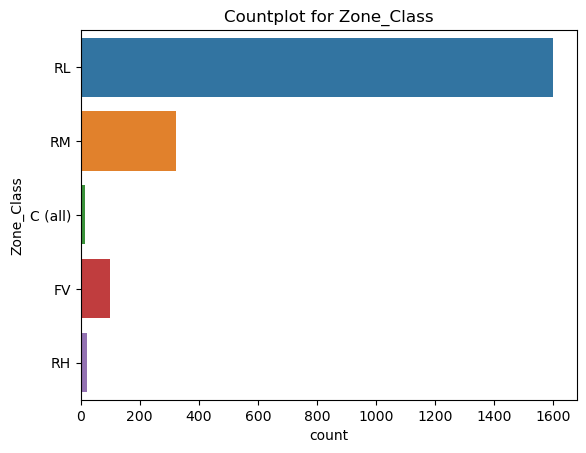

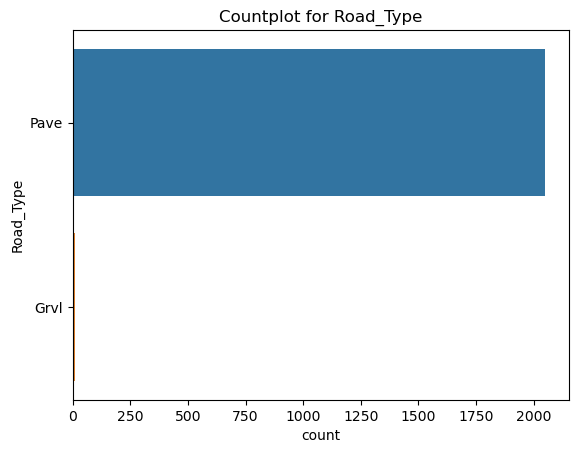

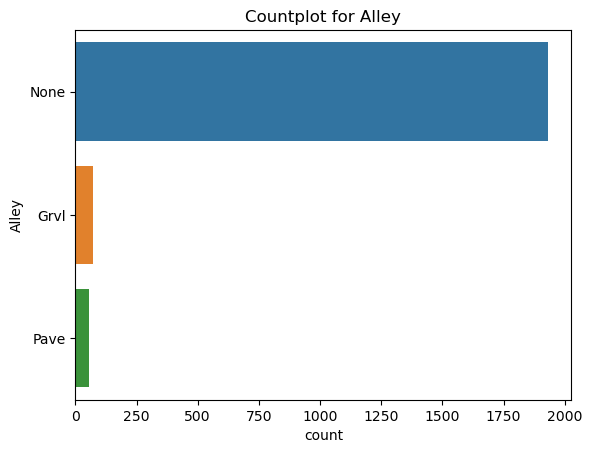

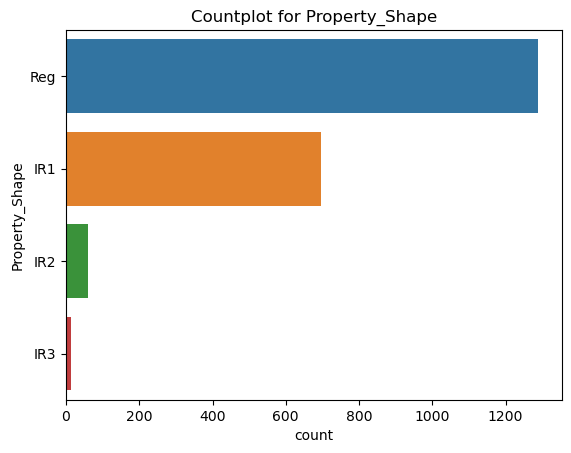

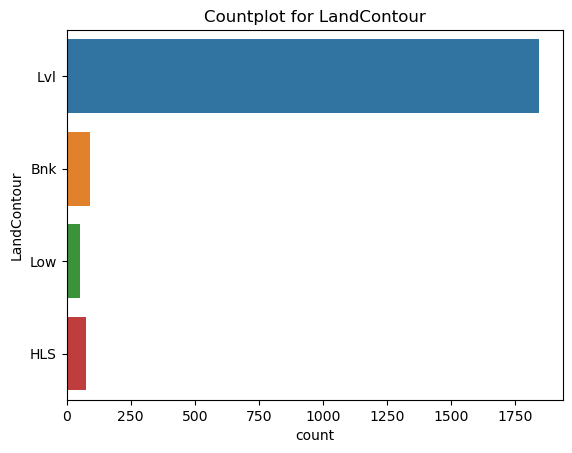

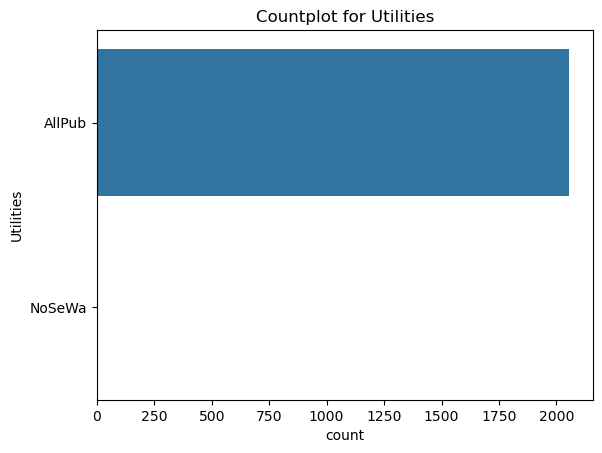

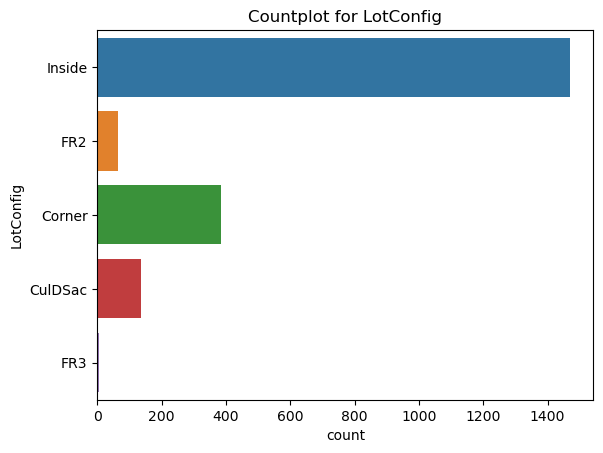

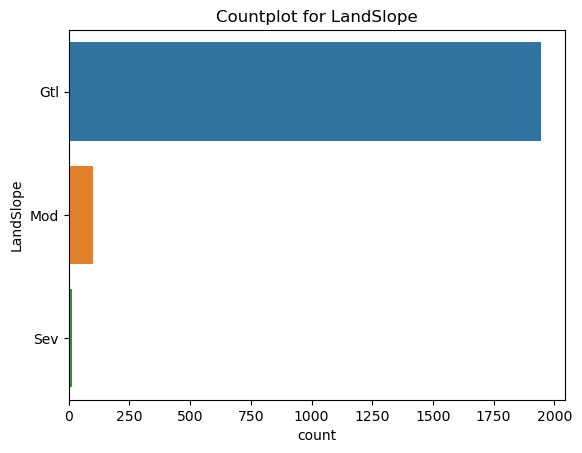

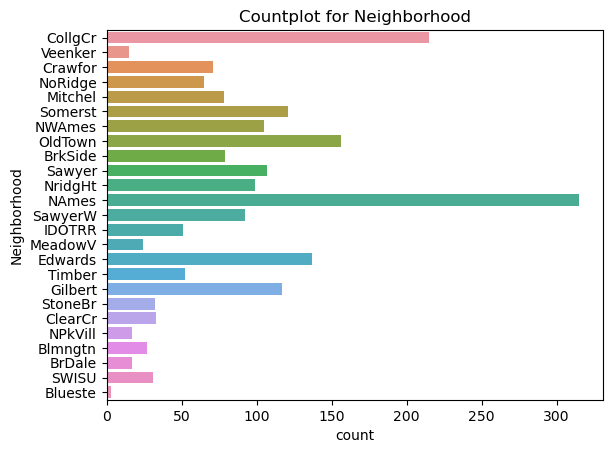

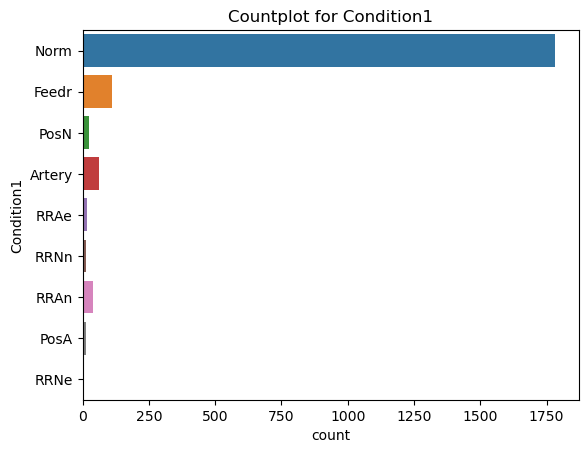

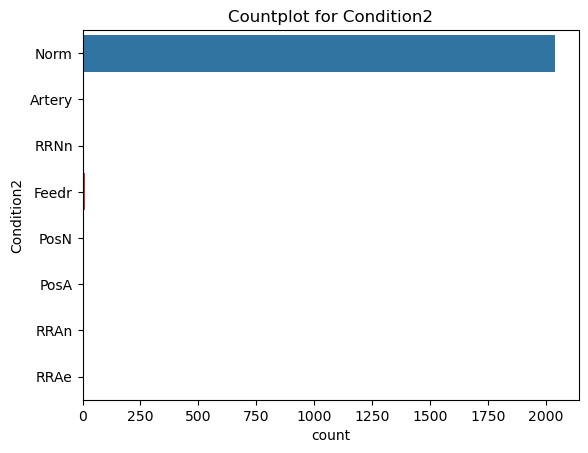

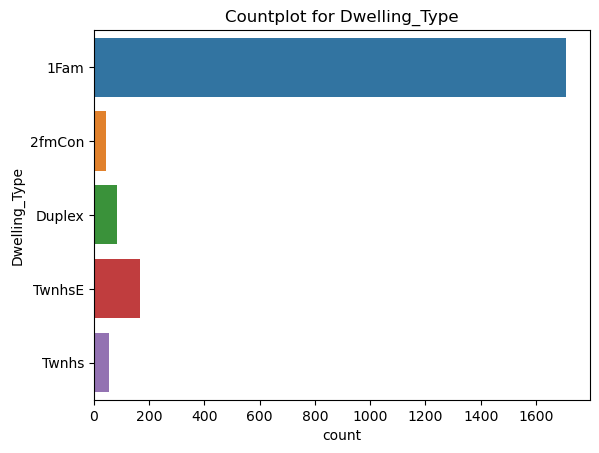

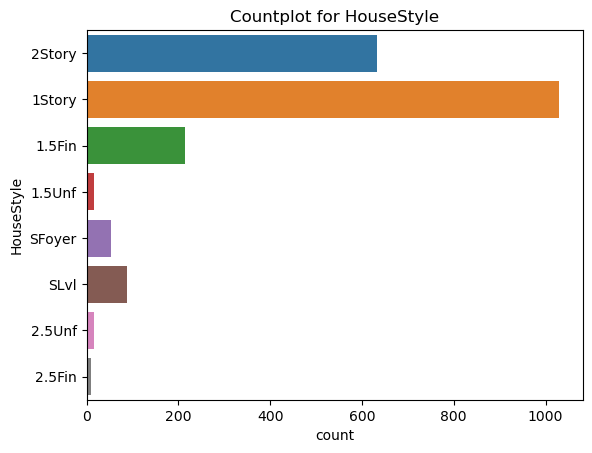

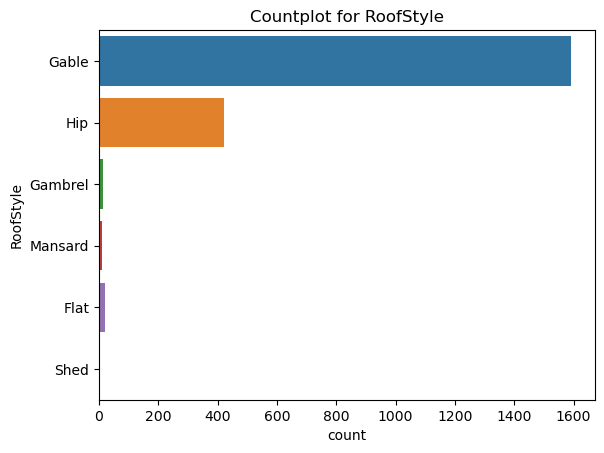

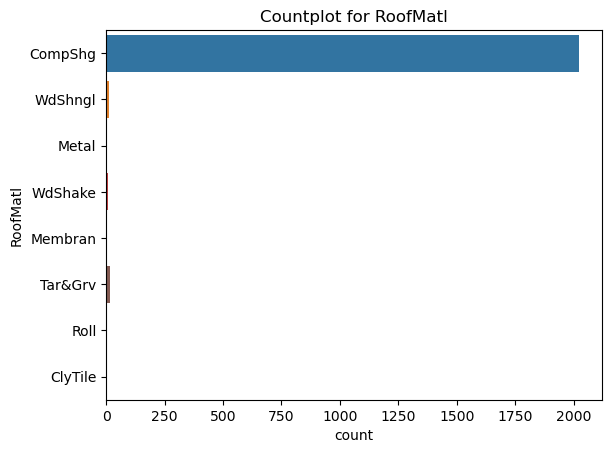

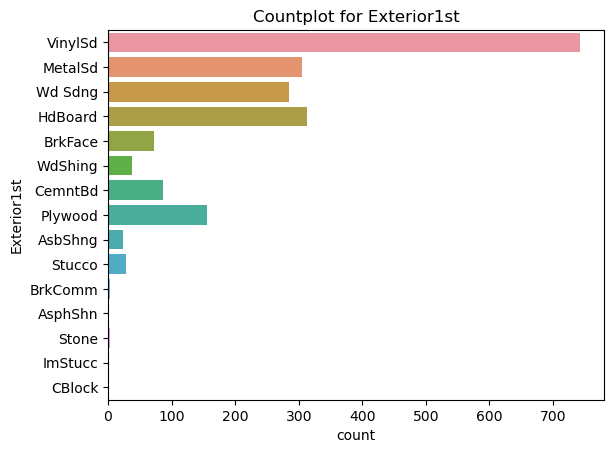

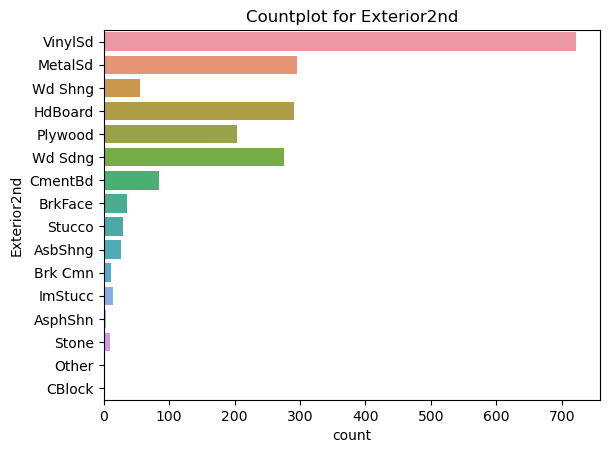

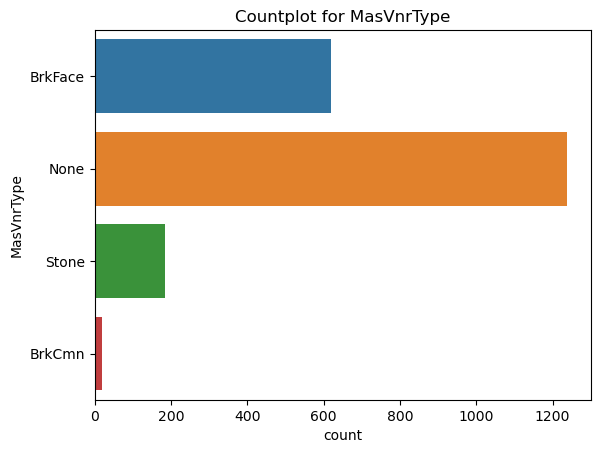

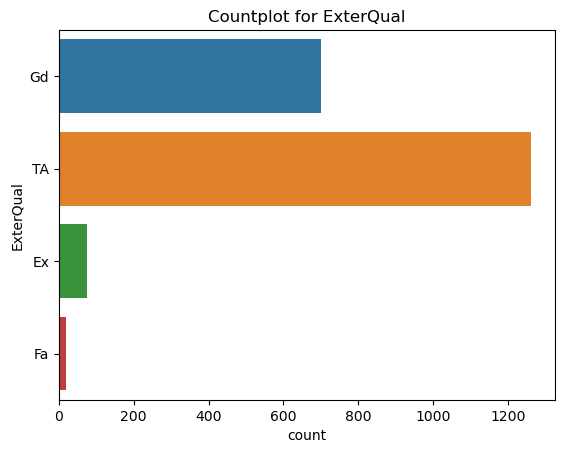

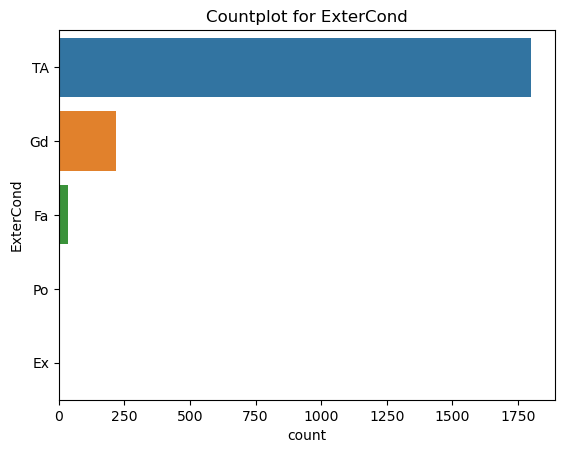

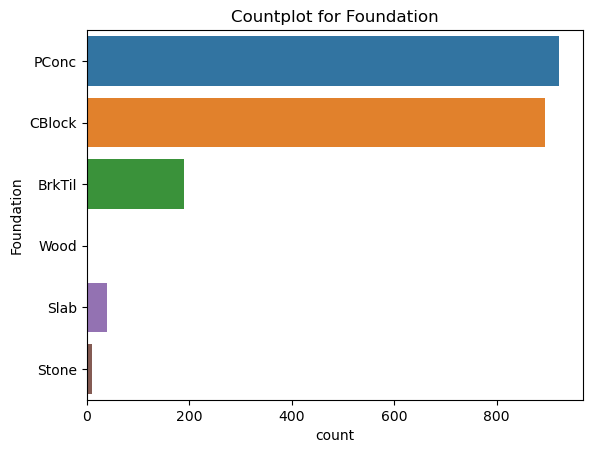

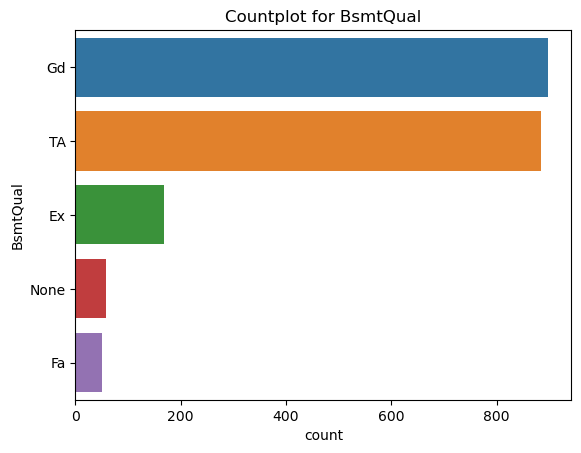

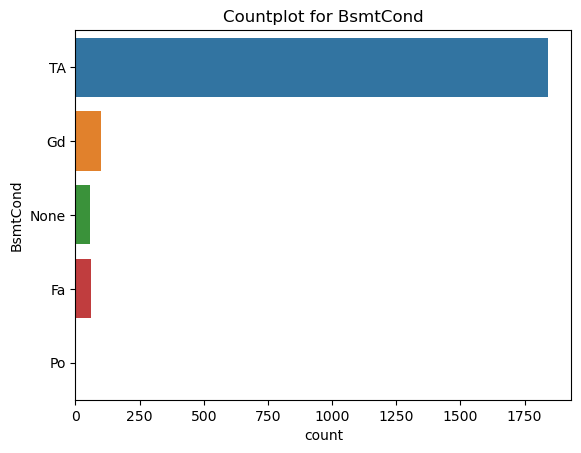

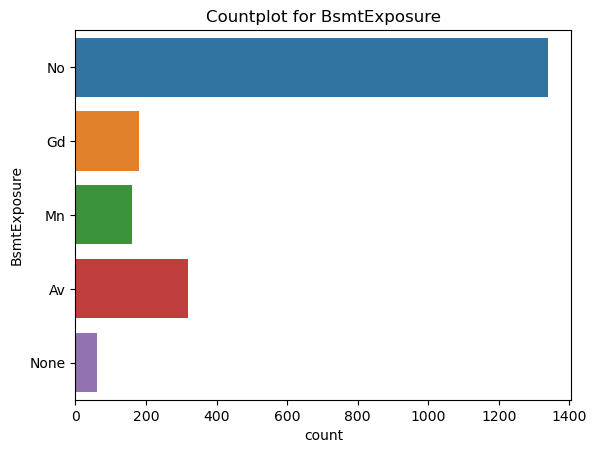

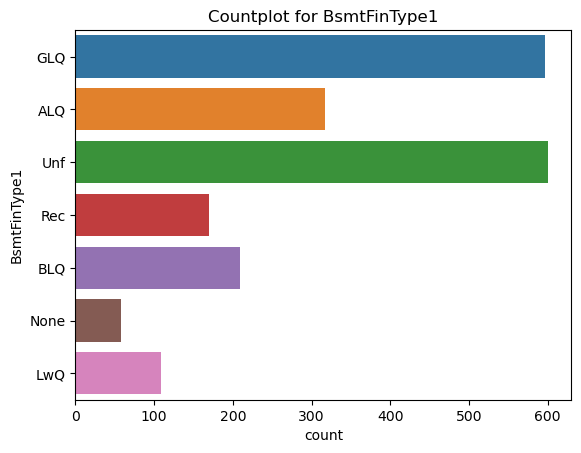

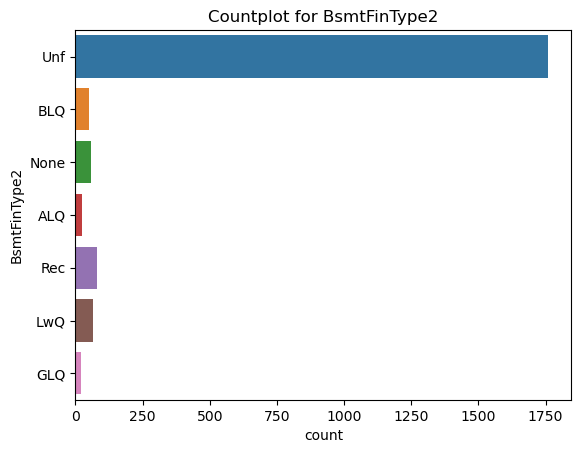

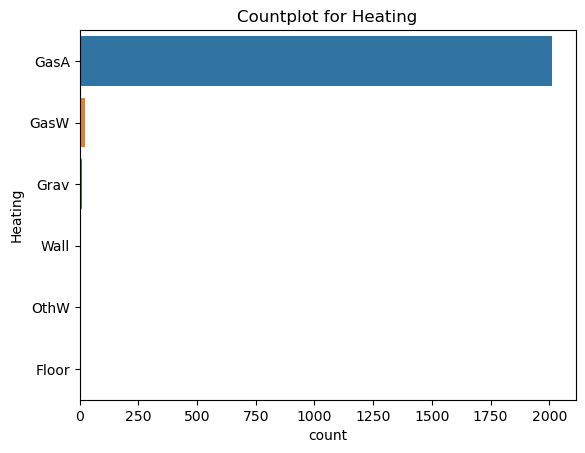

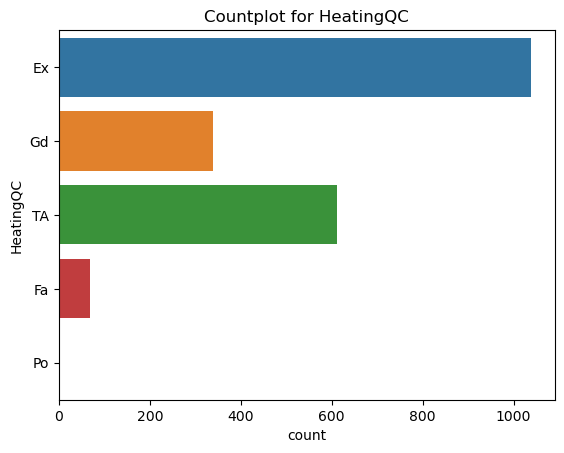

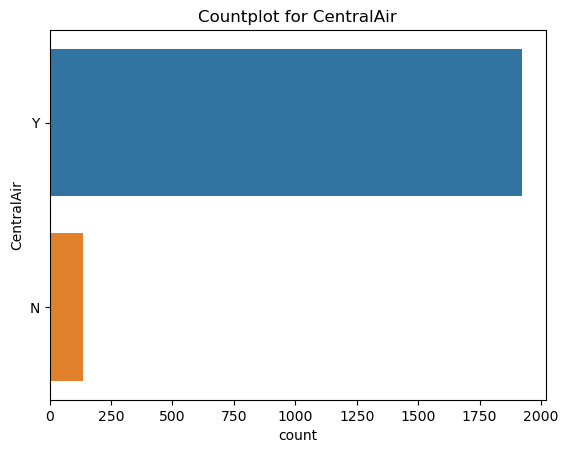

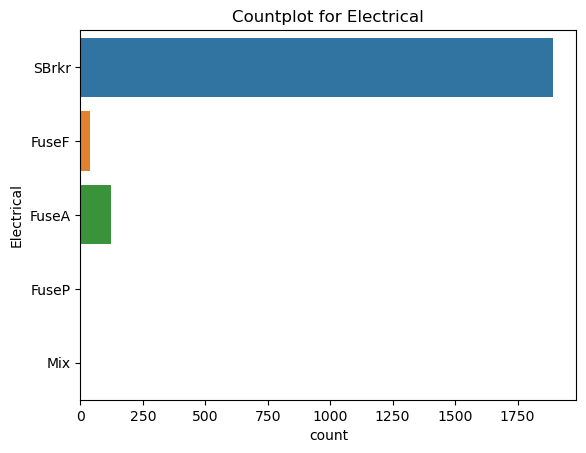

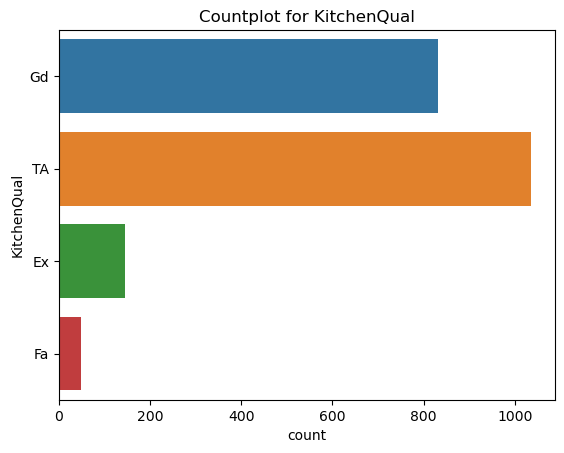

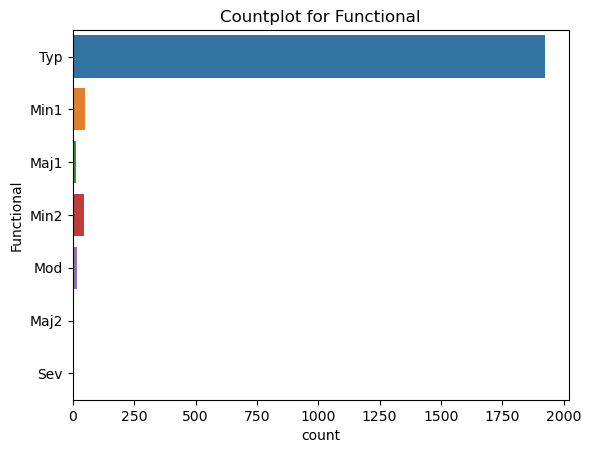

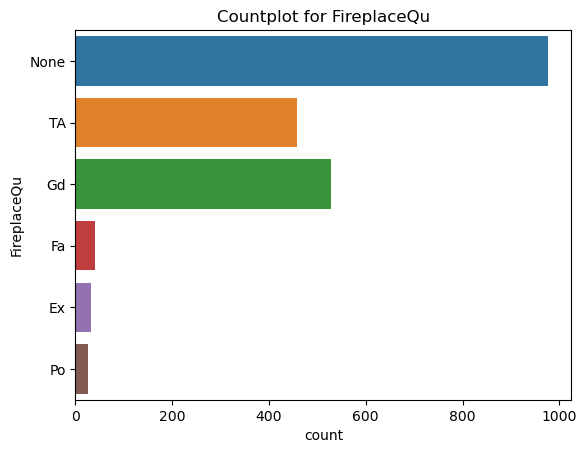

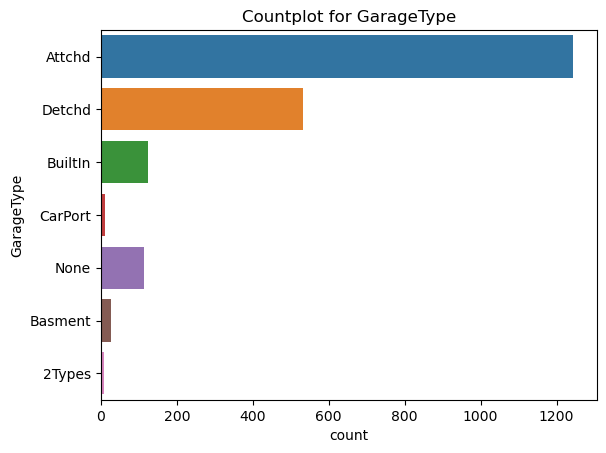

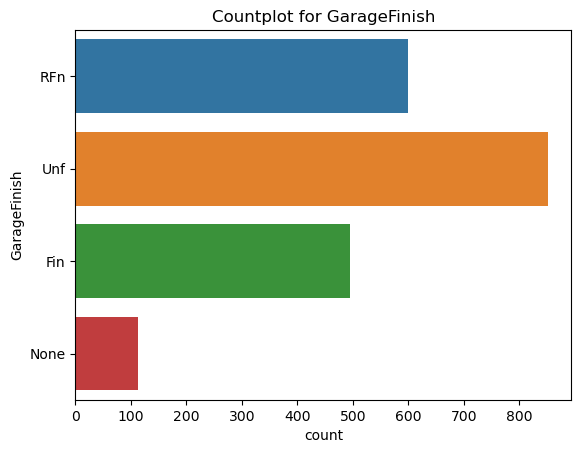

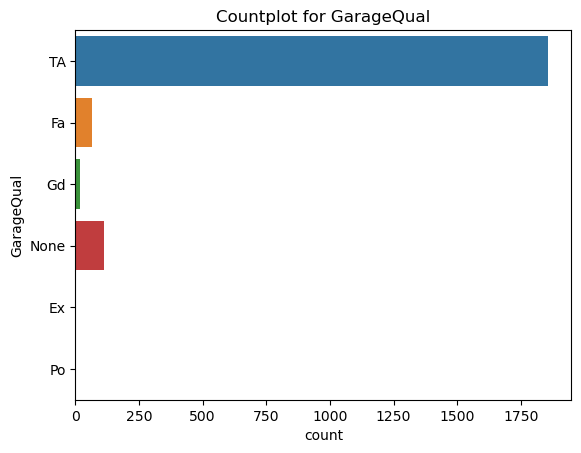

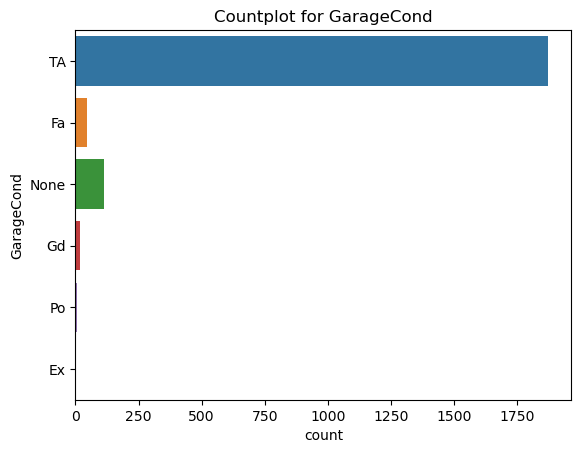

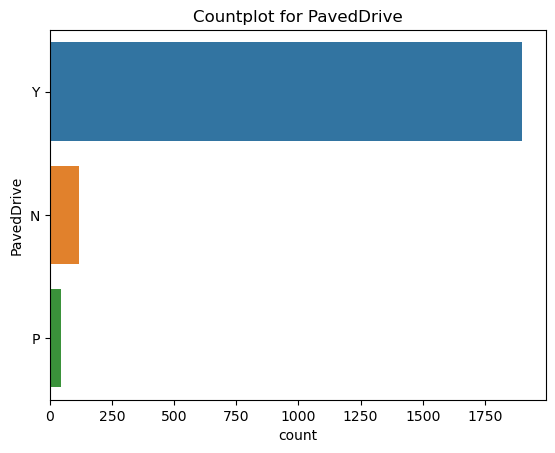

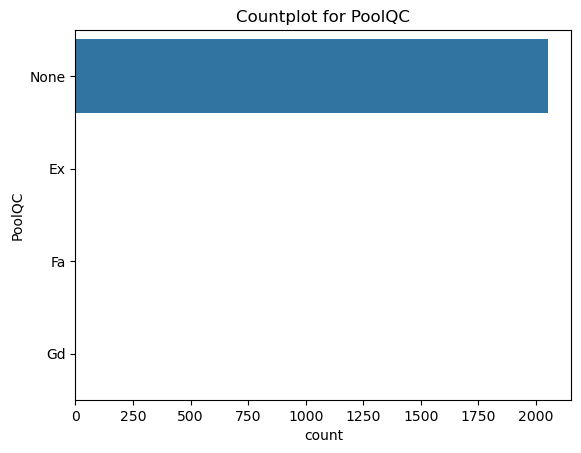

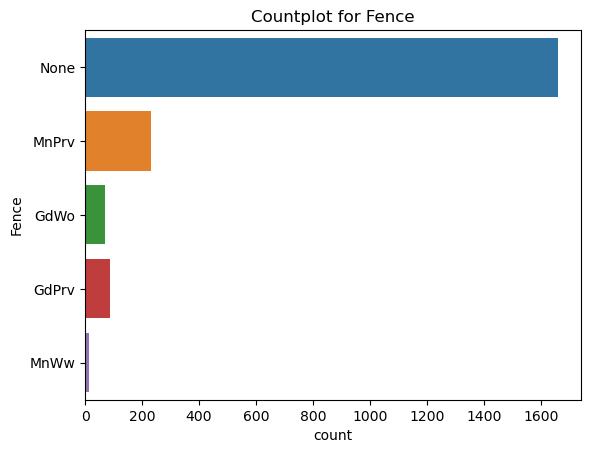

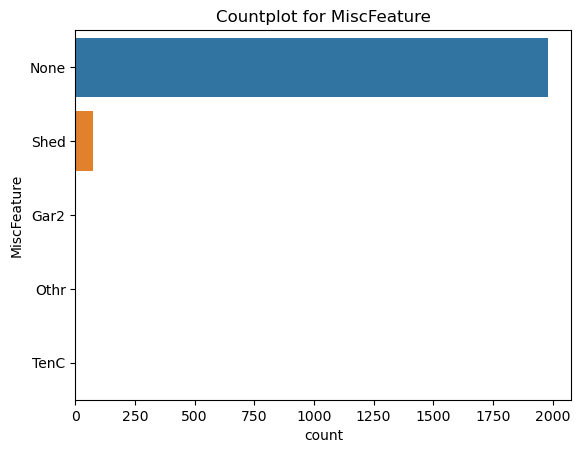

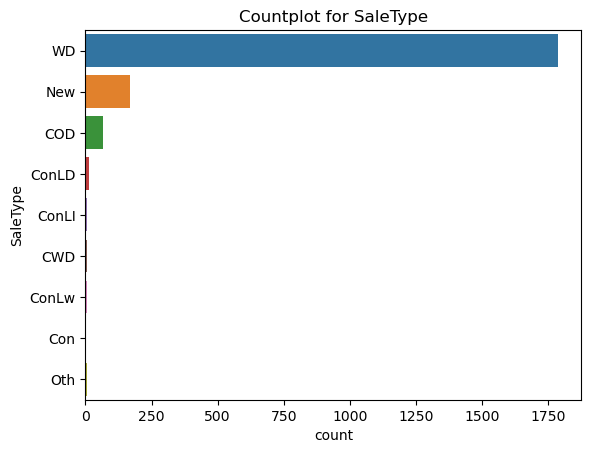

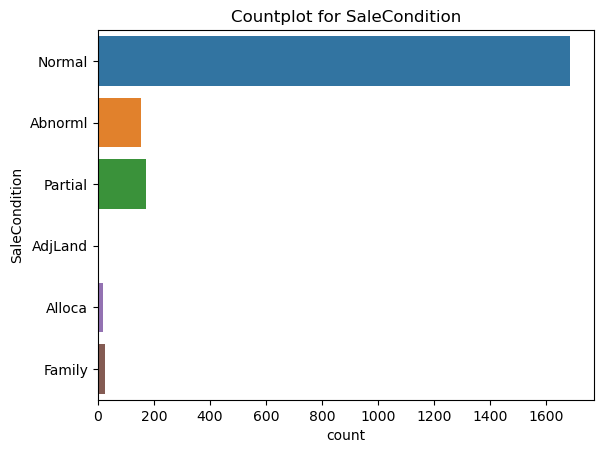

In [171]:
for i in cat_cols:
    sns.countplot(y=df[i])
    plt.title(f'Countplot for {i}')
    plt.show()

#### Inference


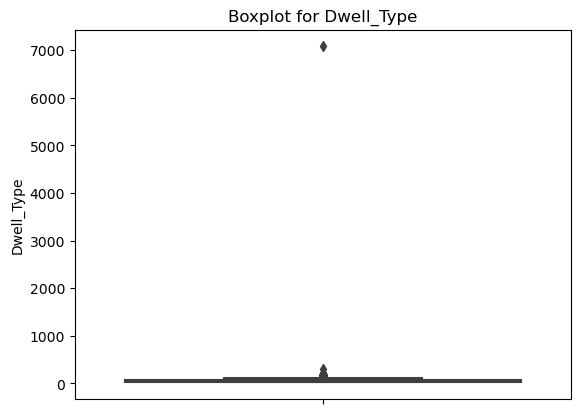

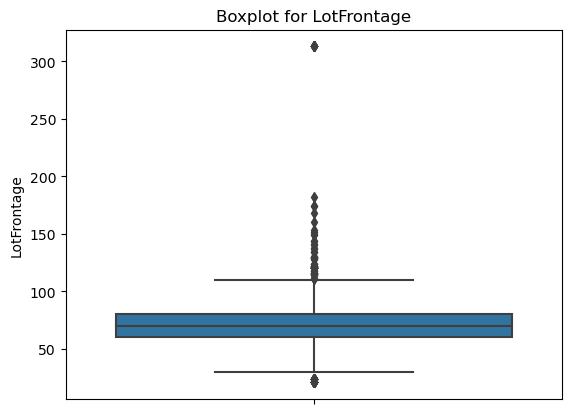

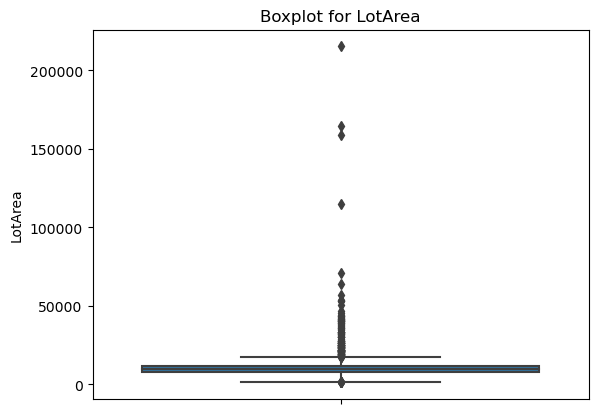

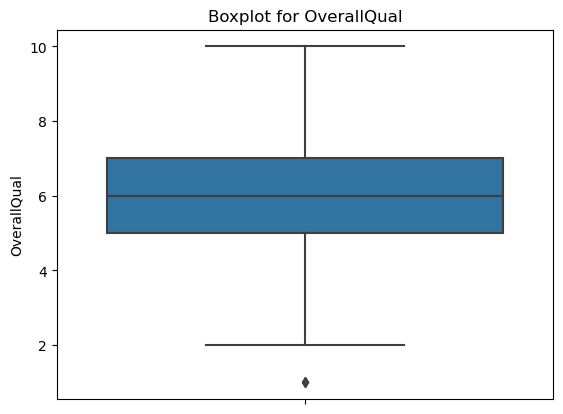

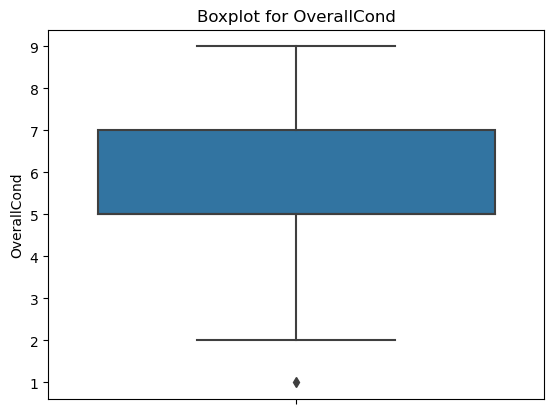

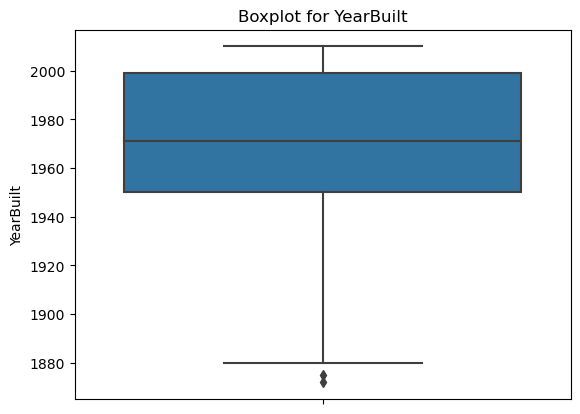

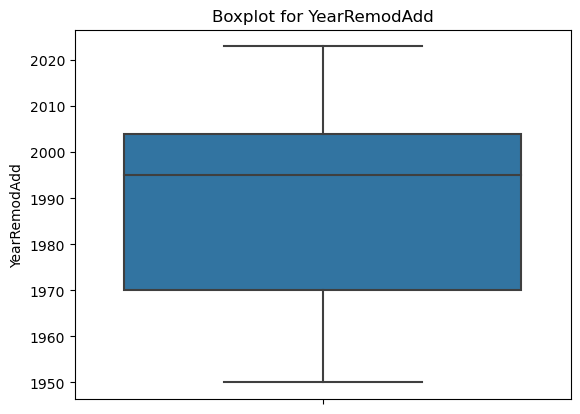

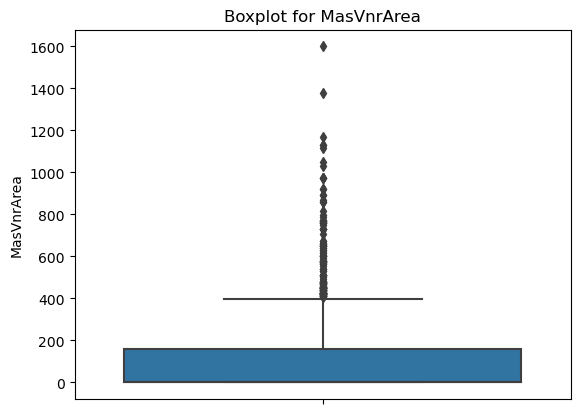

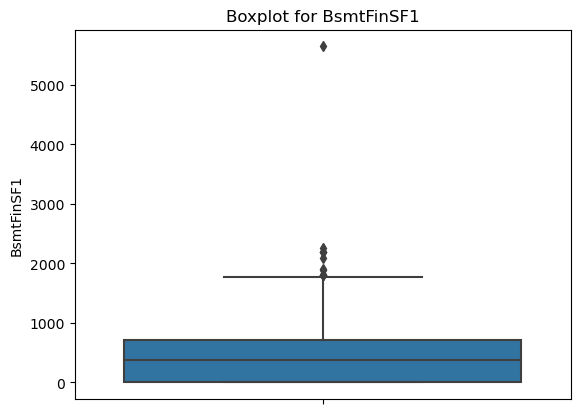

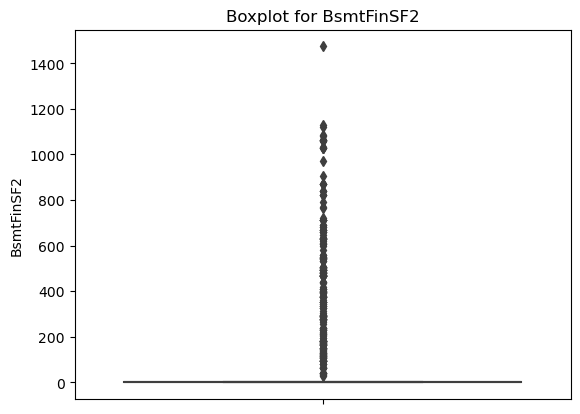

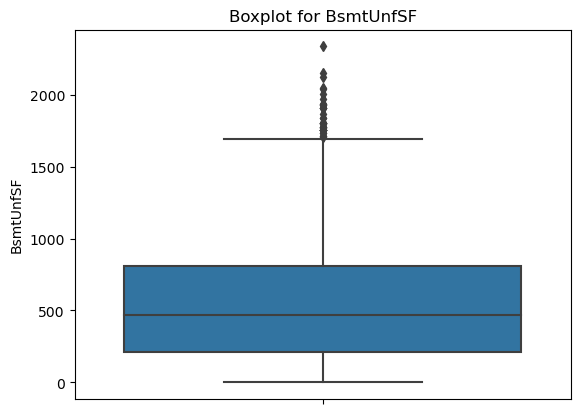

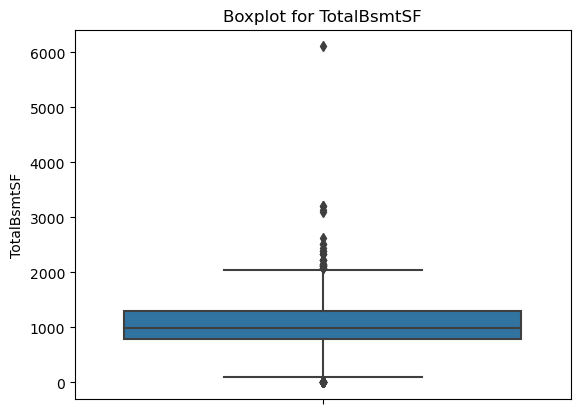

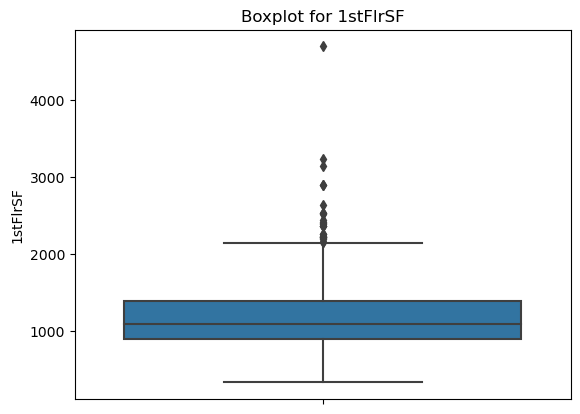

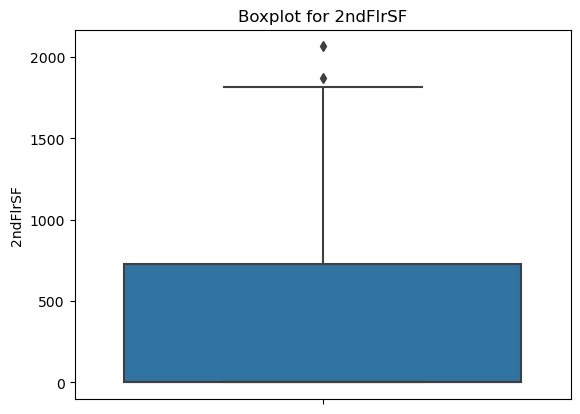

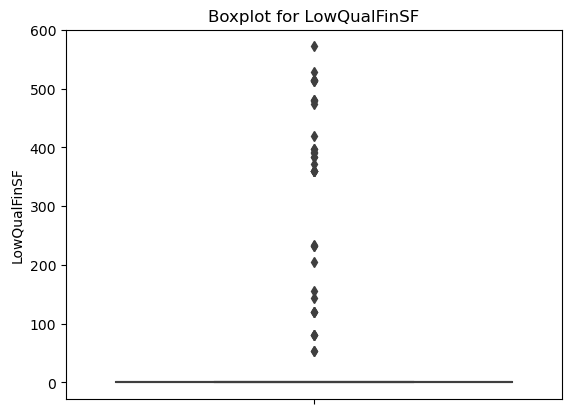

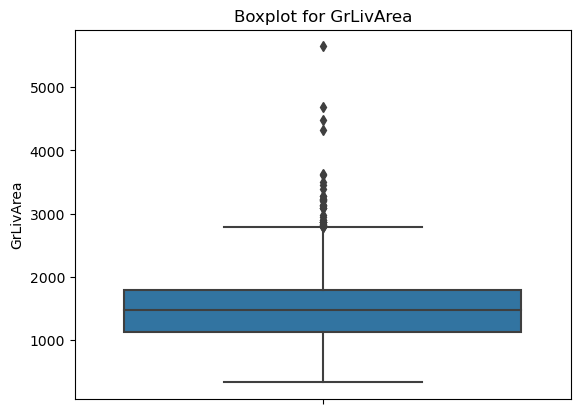

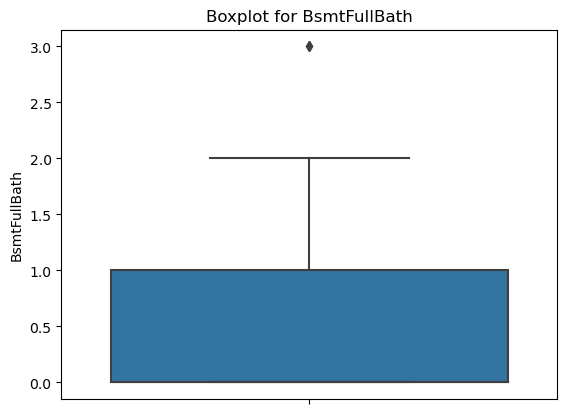

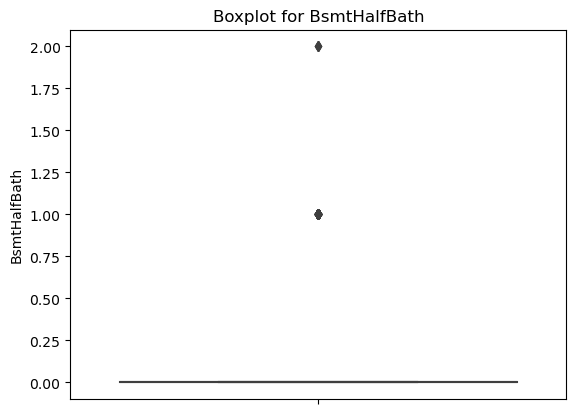

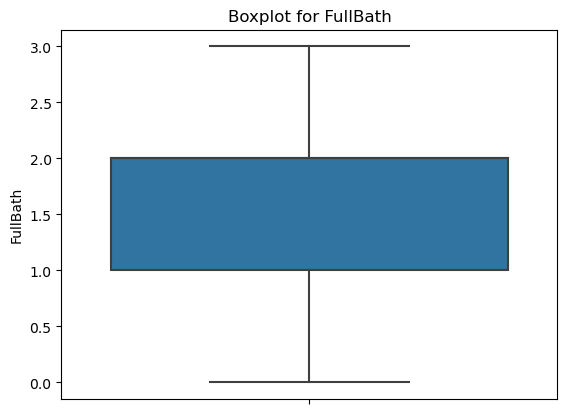

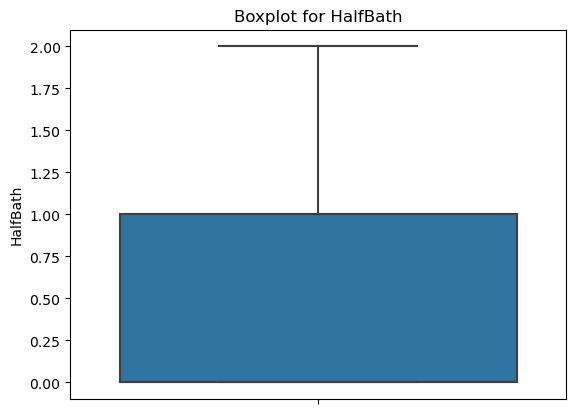

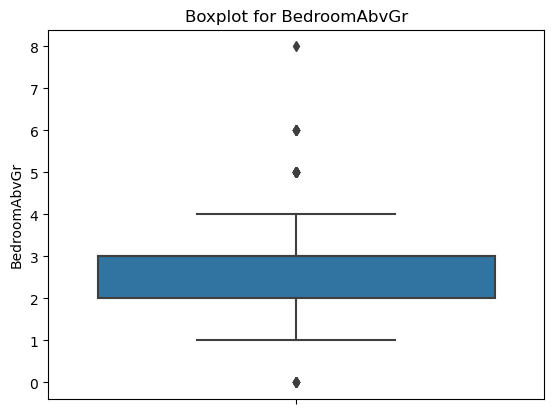

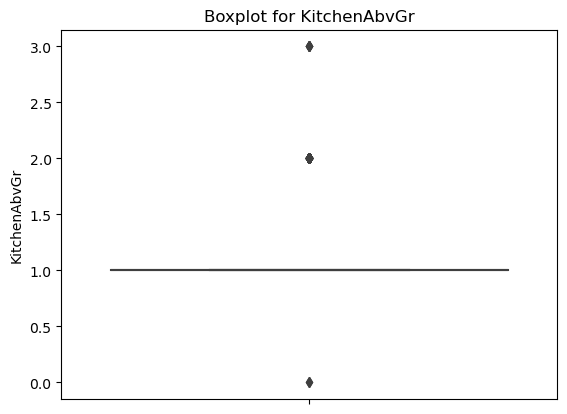

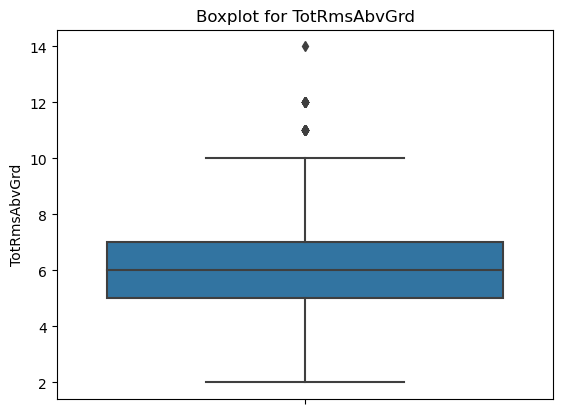

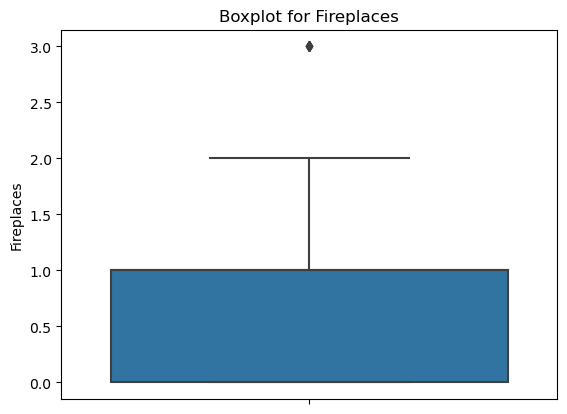

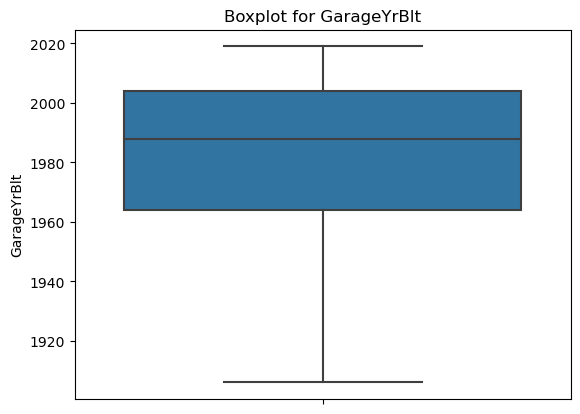

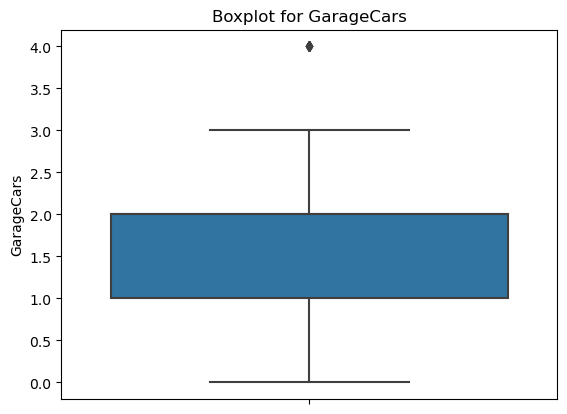

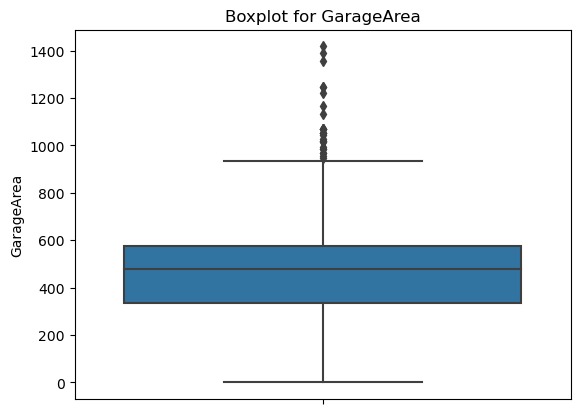

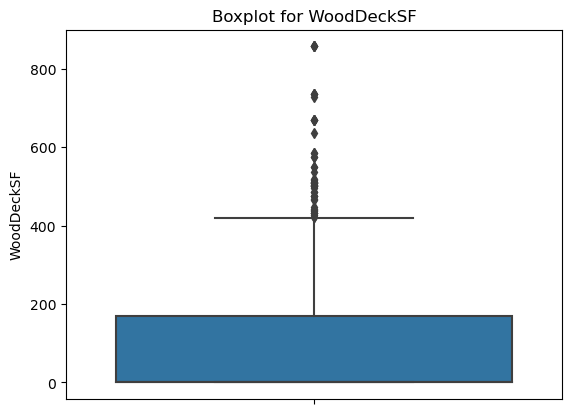

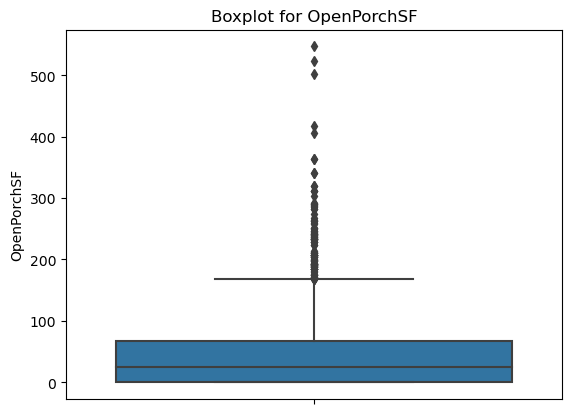

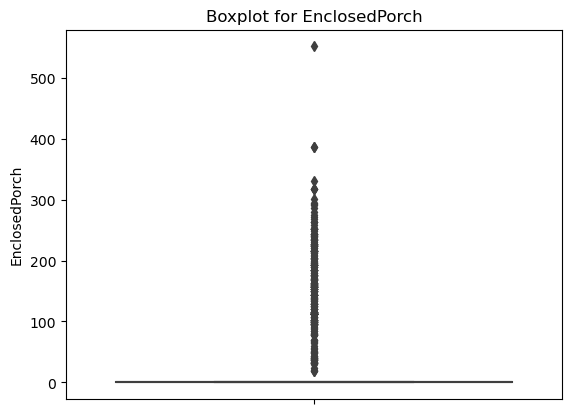

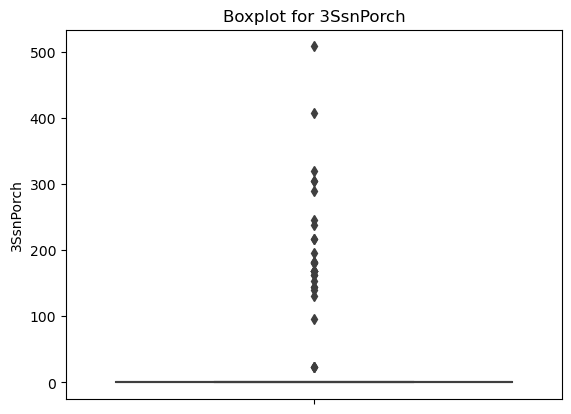

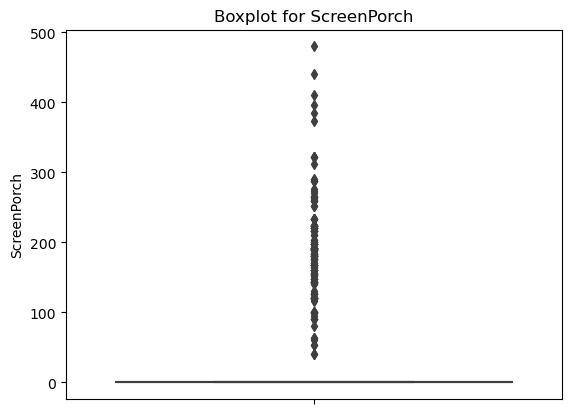

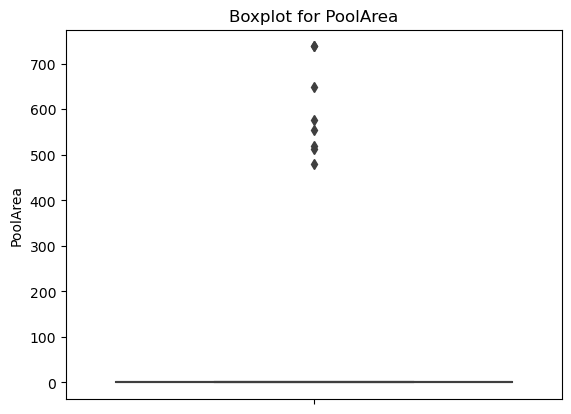

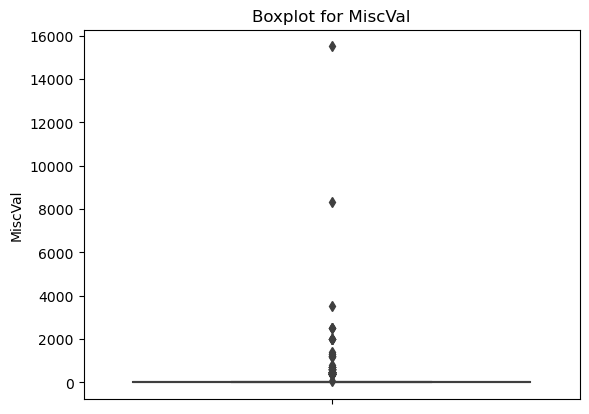

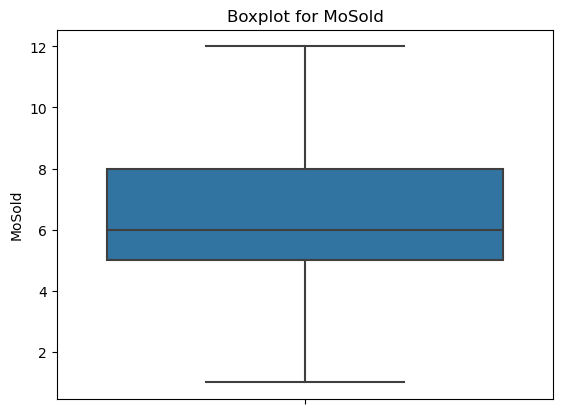

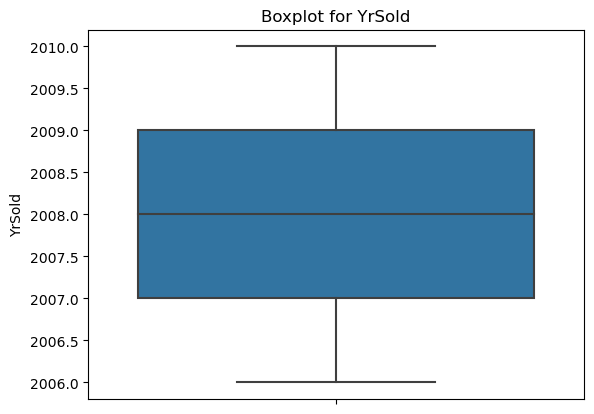

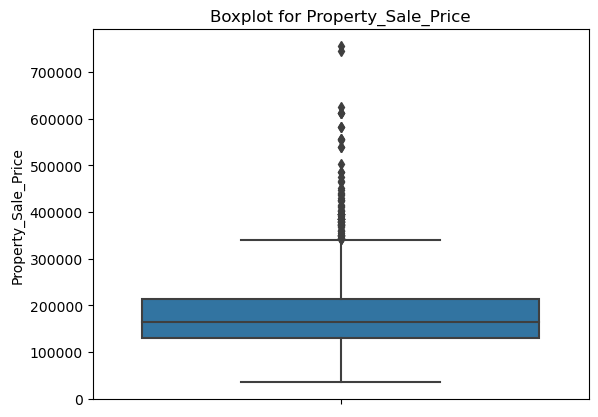

In [172]:
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

#### Inference

### Bi-Variate Analysis
<pre>
num-num : Scatterplot, pairplot
num-cat : T-test, ANOVA, boxplot
cat-cat : Chi-Square test
</pre>

In [173]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [174]:
print(num_cols)

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')


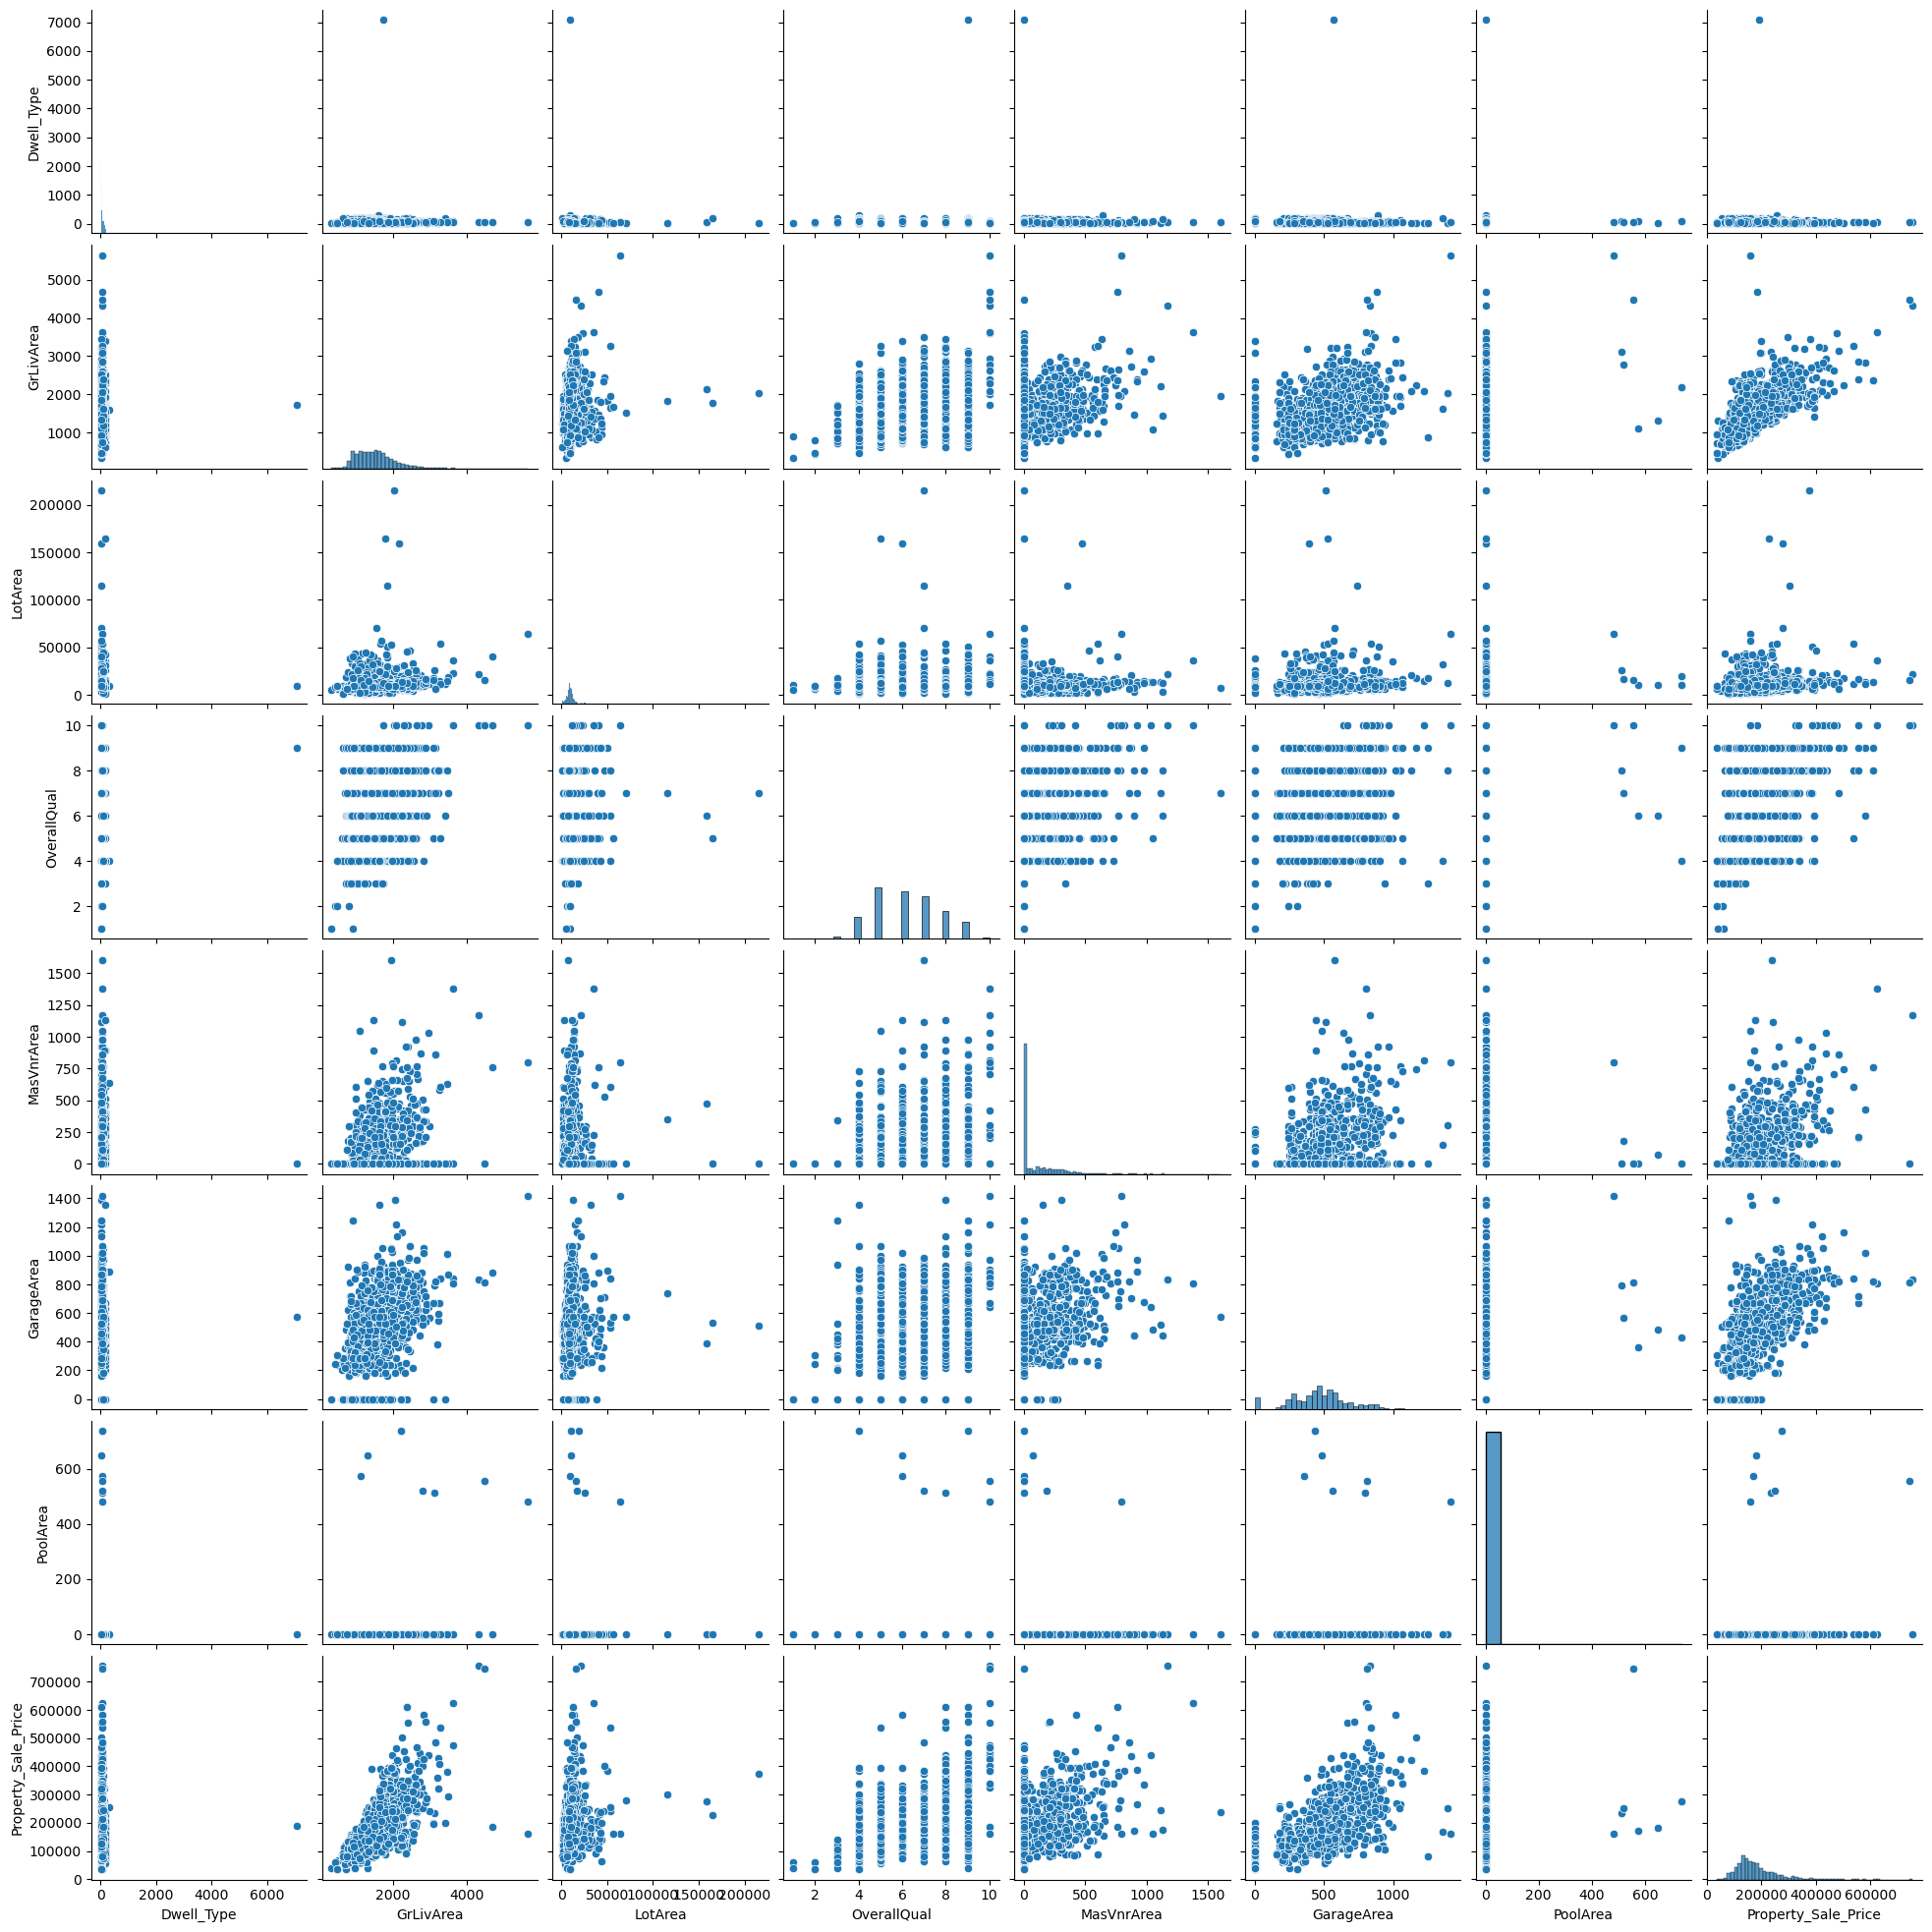

In [175]:
sns.pairplot(df,vars=['Dwell_Type','GrLivArea', 'LotArea', 'OverallQual',
                      'MasVnrArea','GarageArea','PoolArea','Property_Sale_Price'])
plt.show()

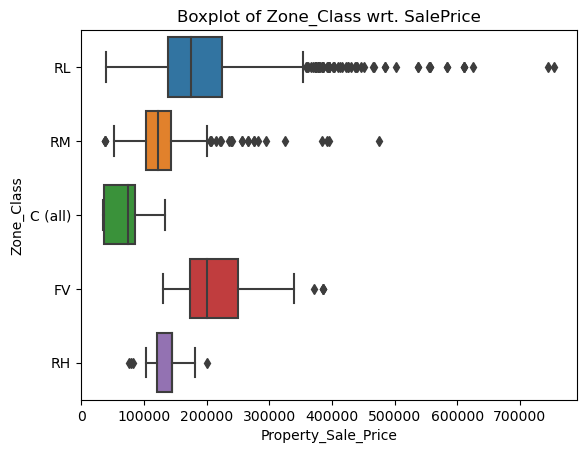

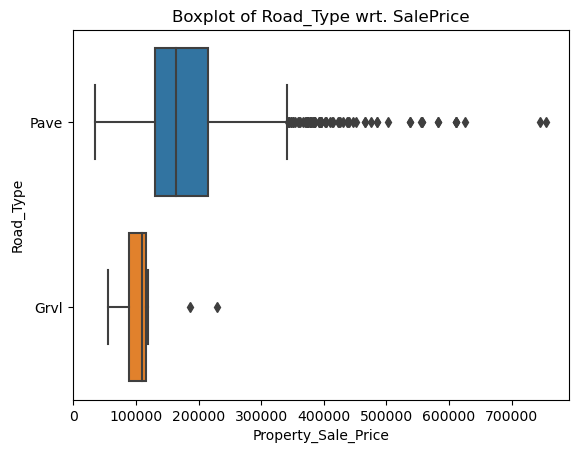

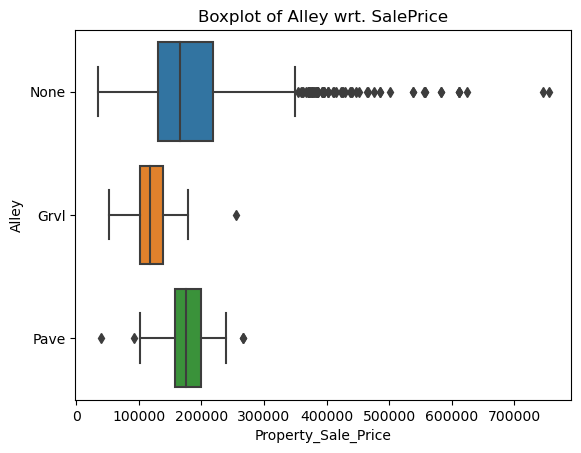

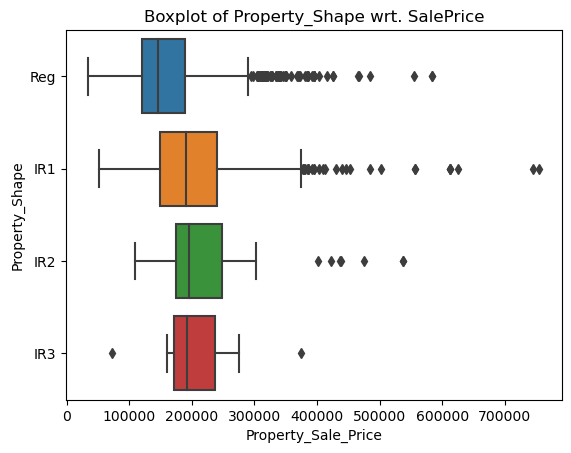

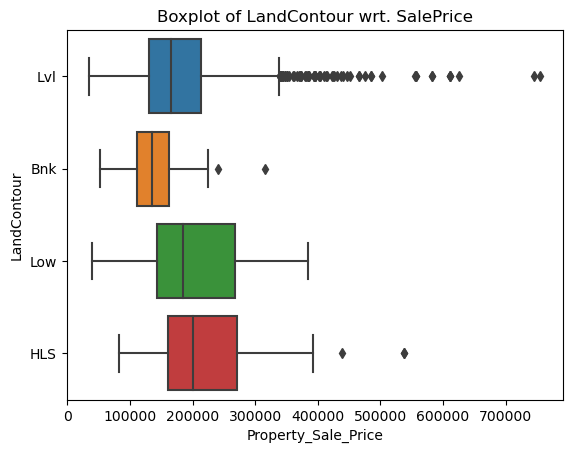

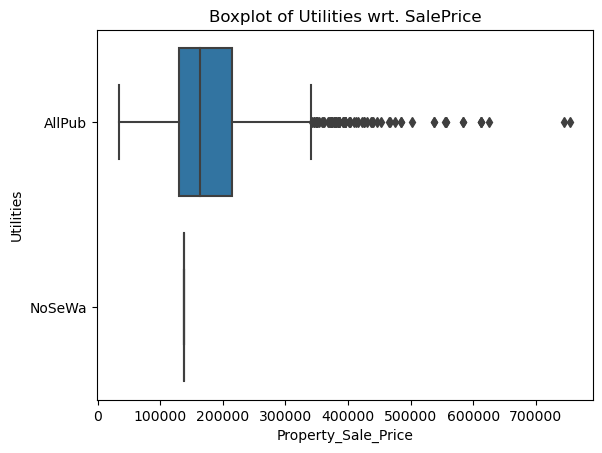

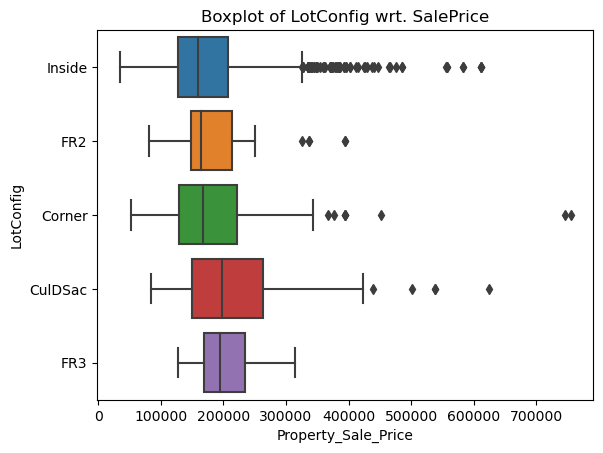

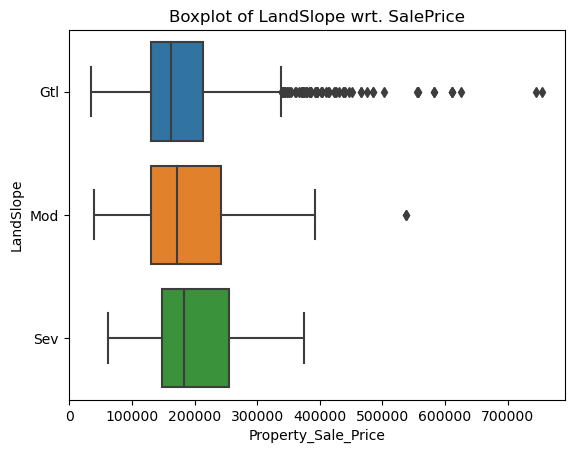

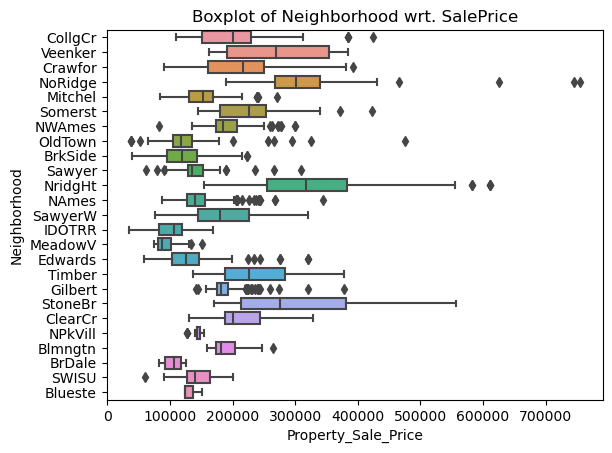

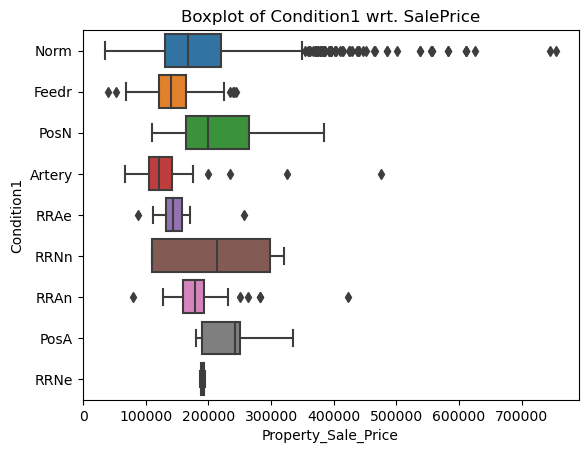

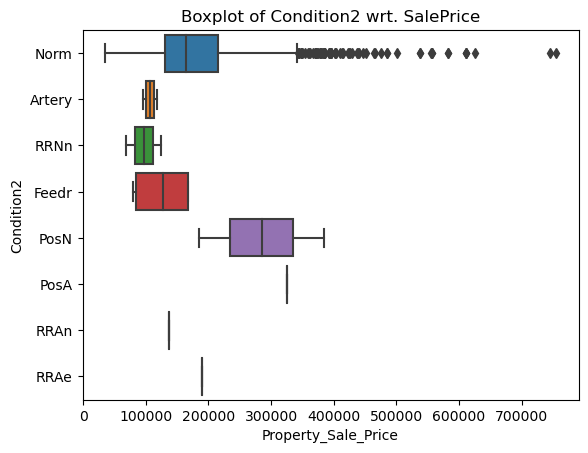

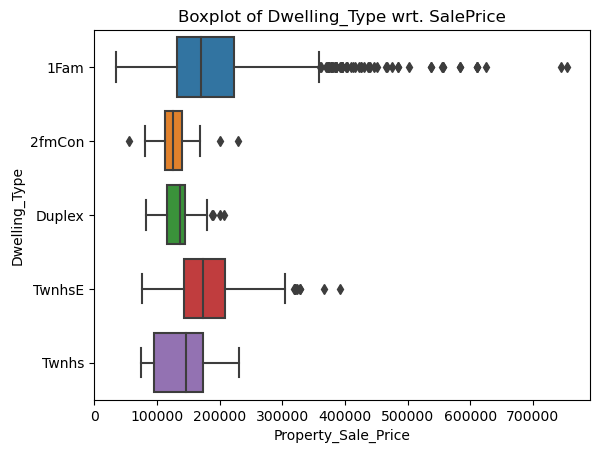

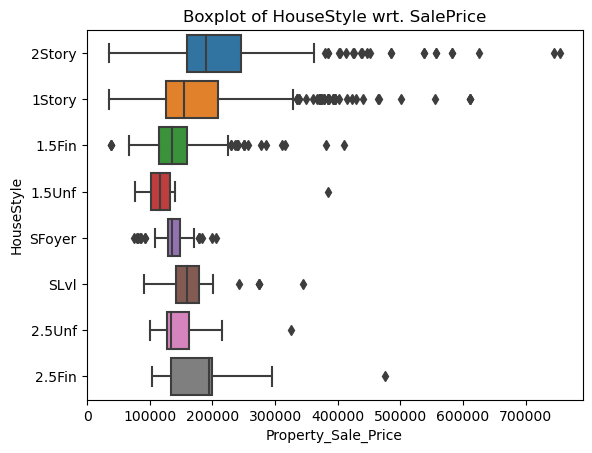

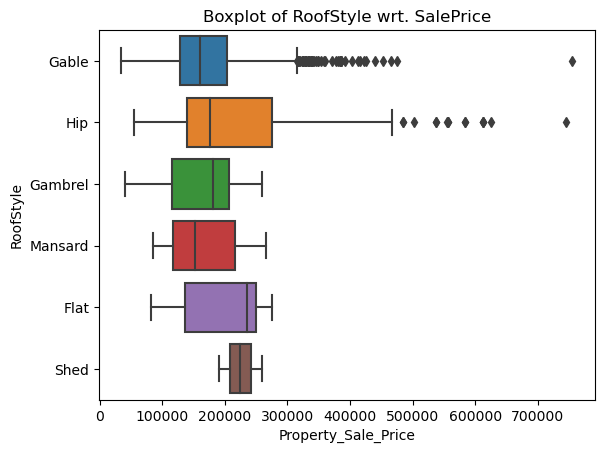

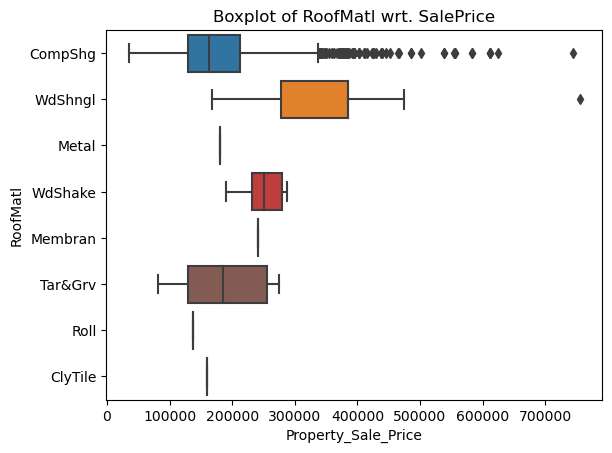

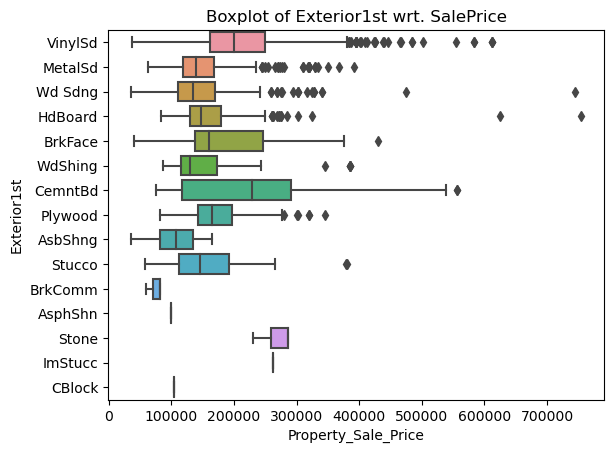

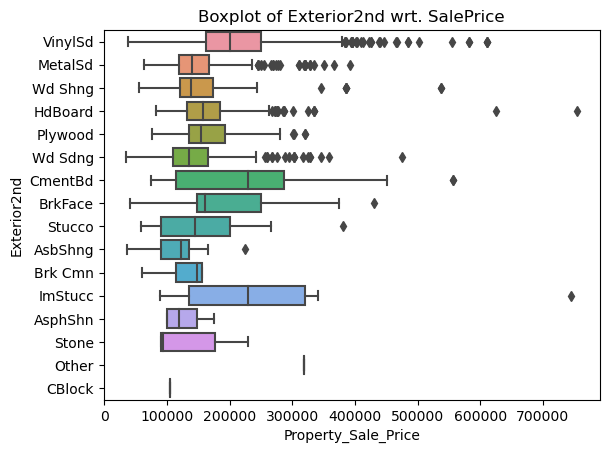

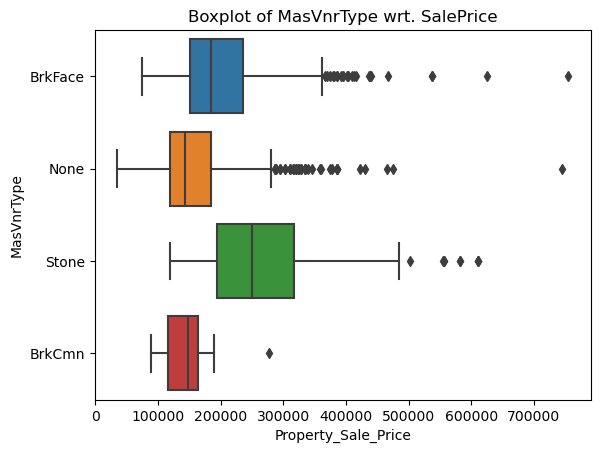

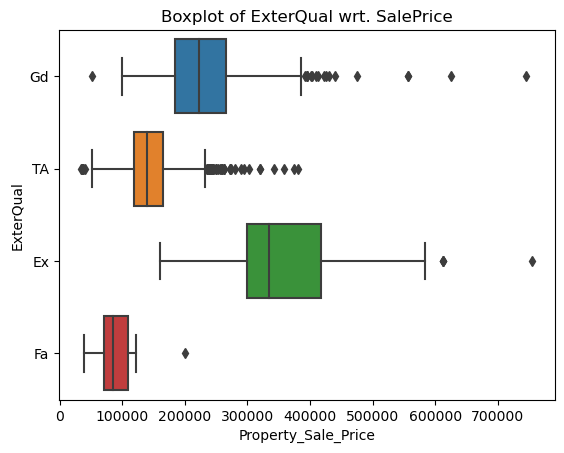

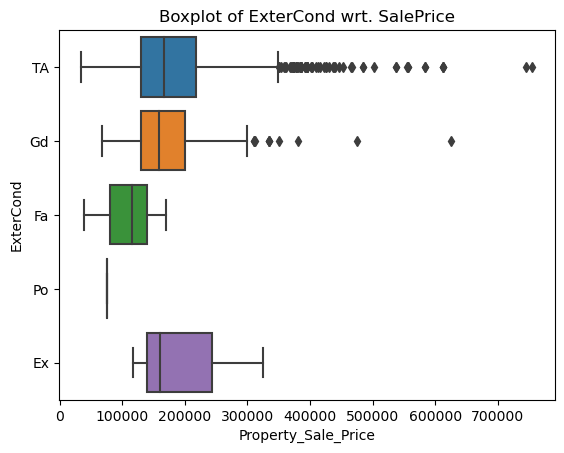

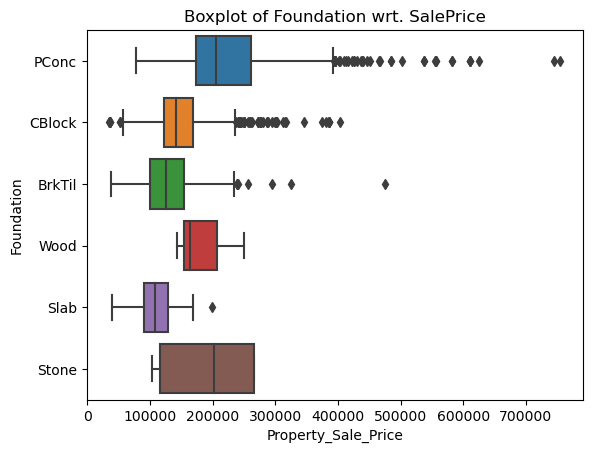

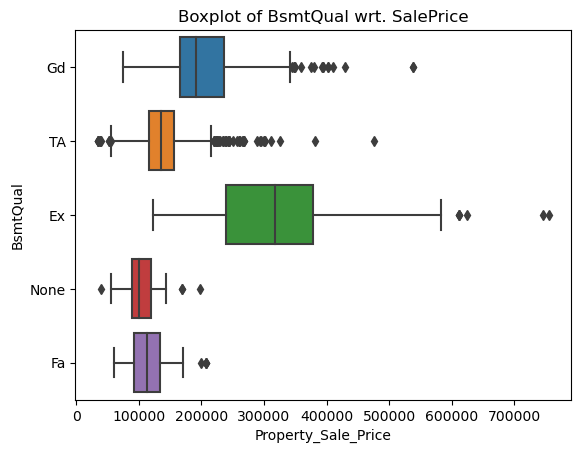

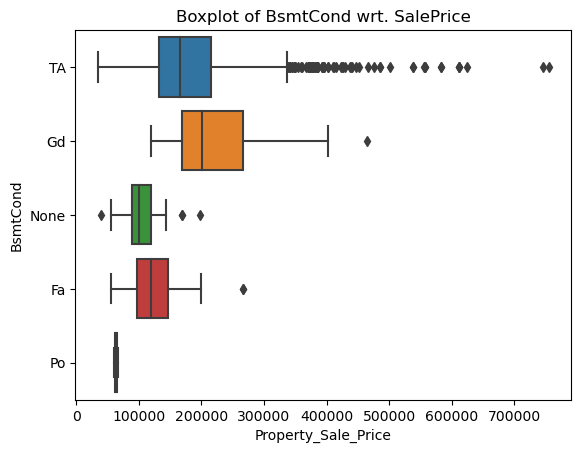

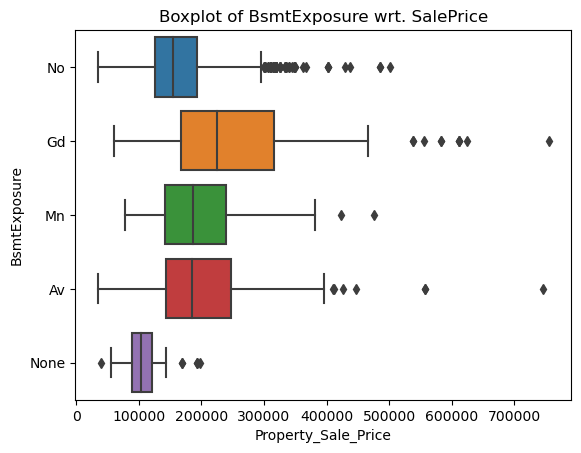

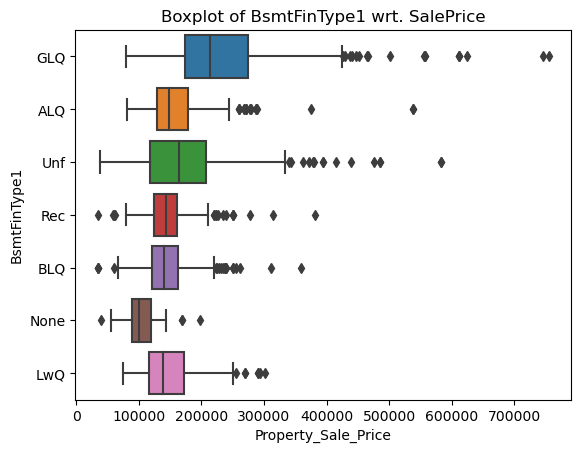

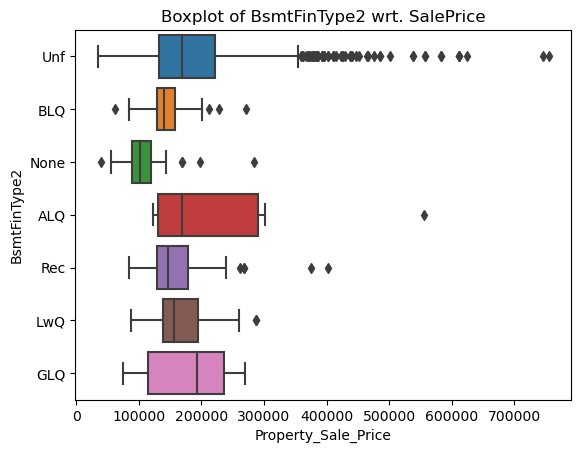

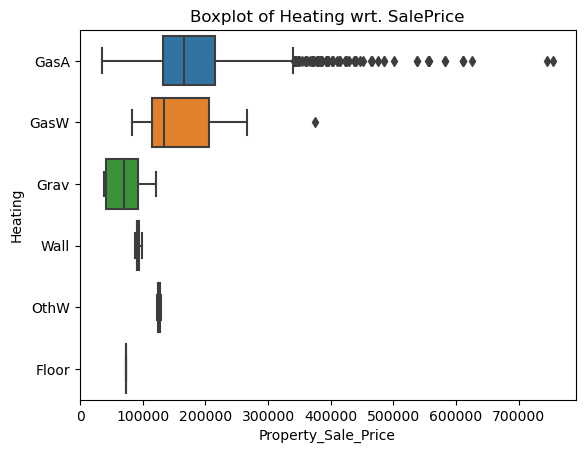

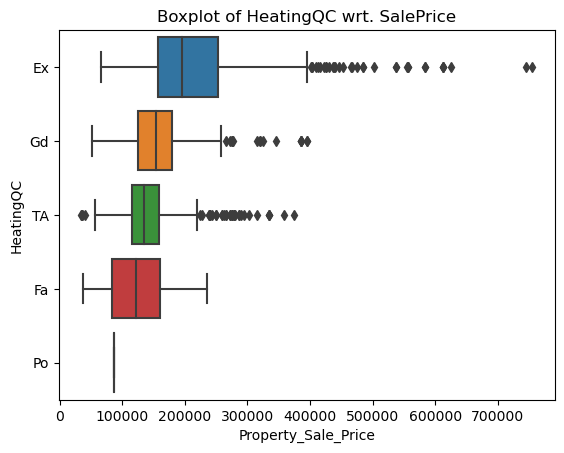

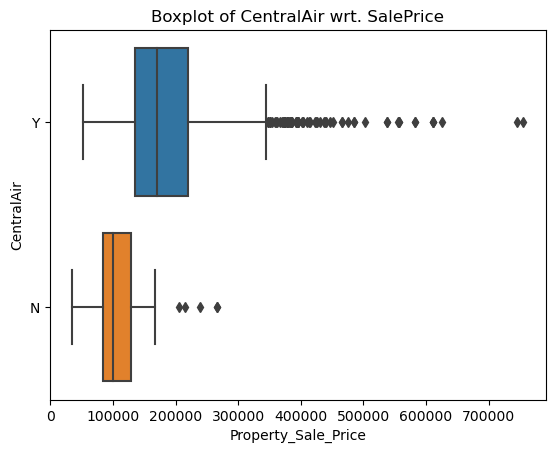

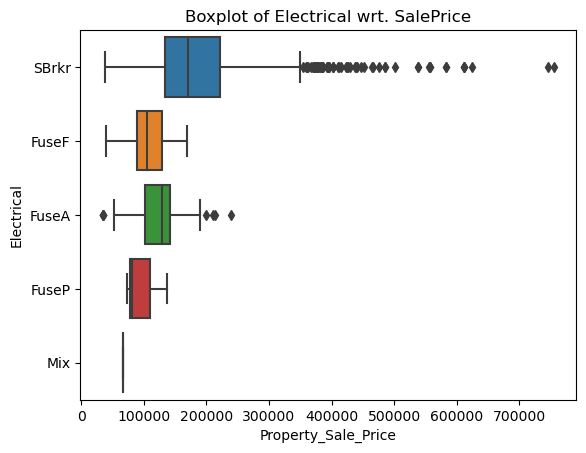

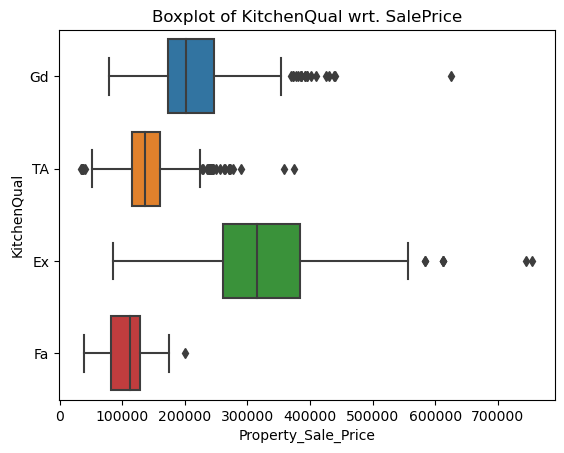

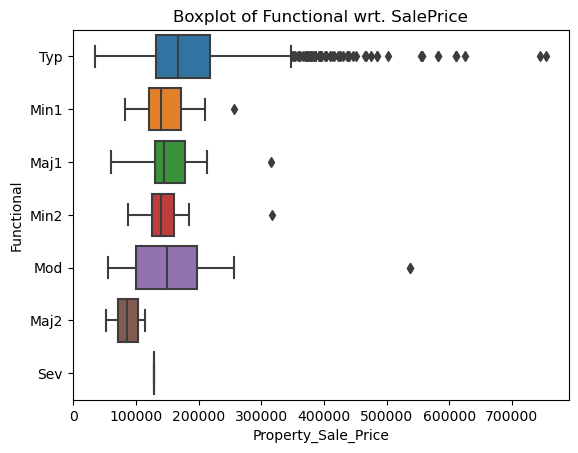

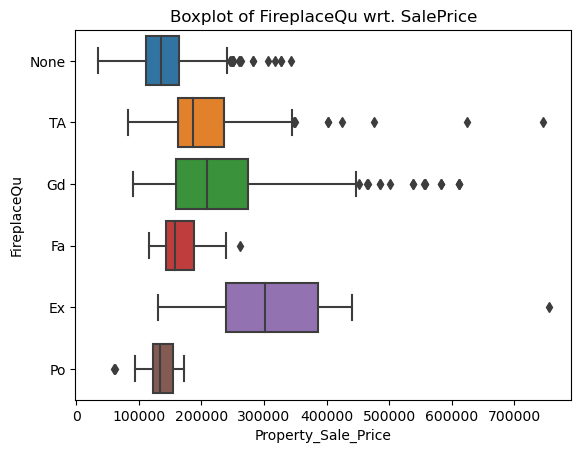

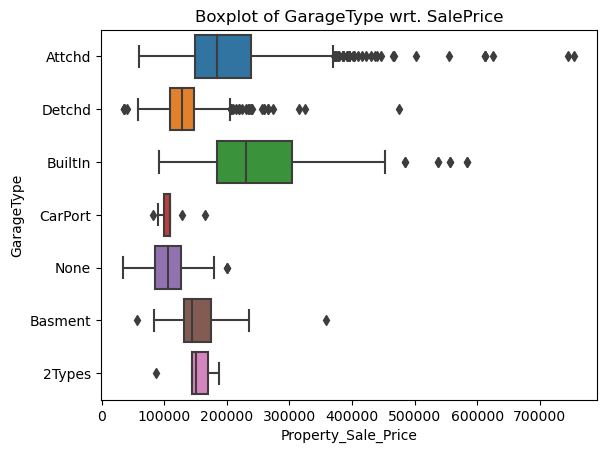

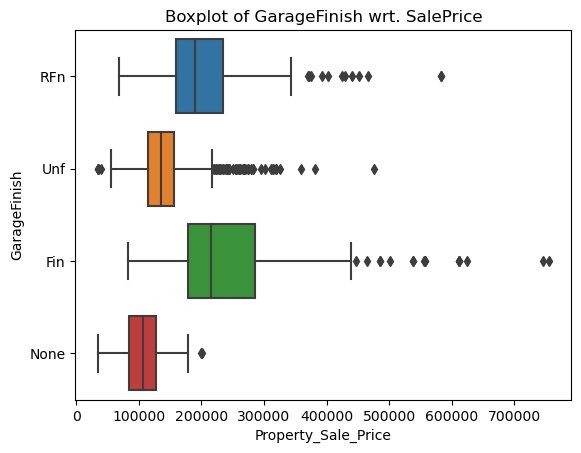

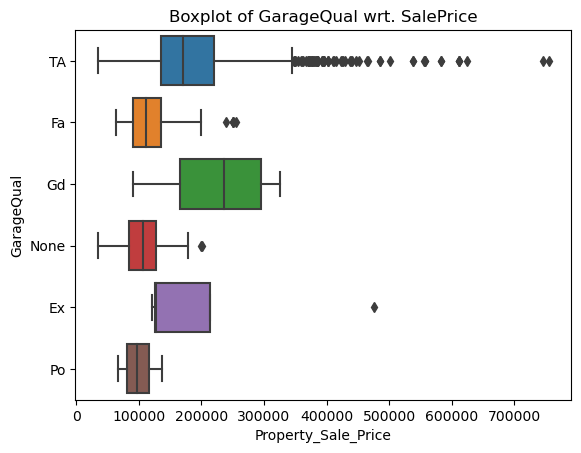

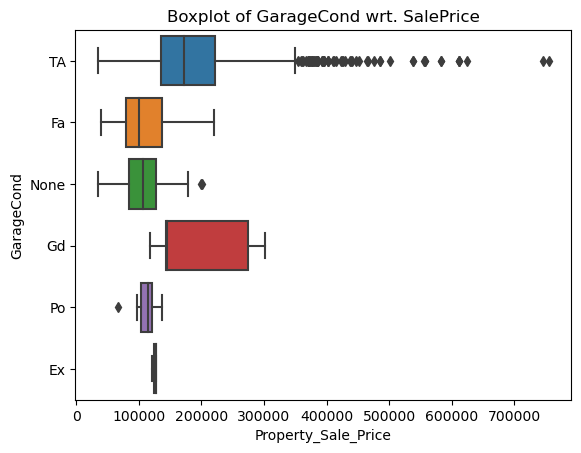

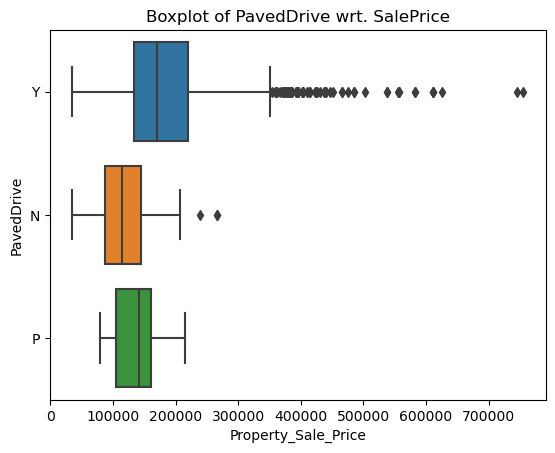

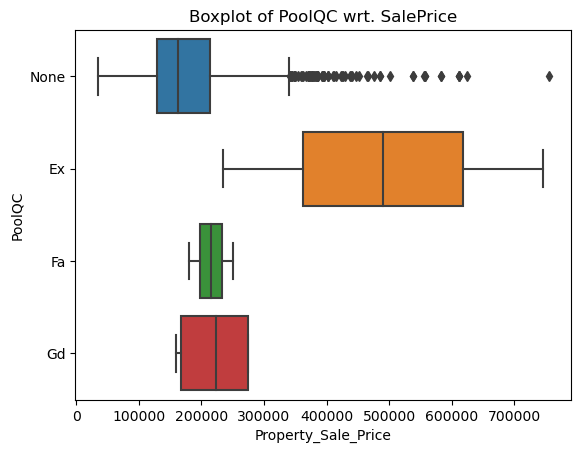

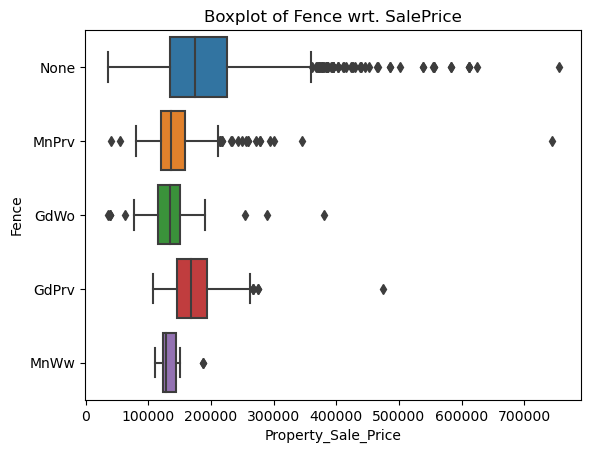

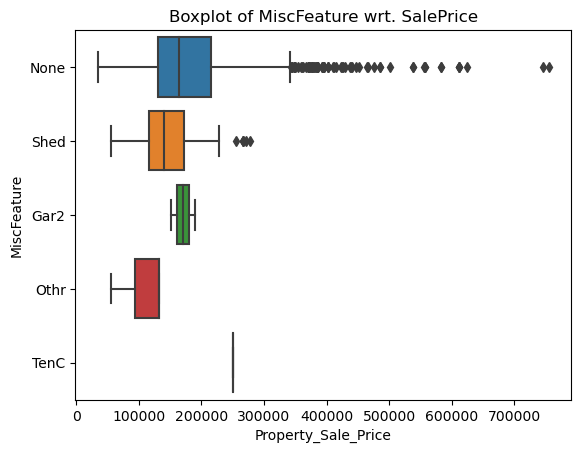

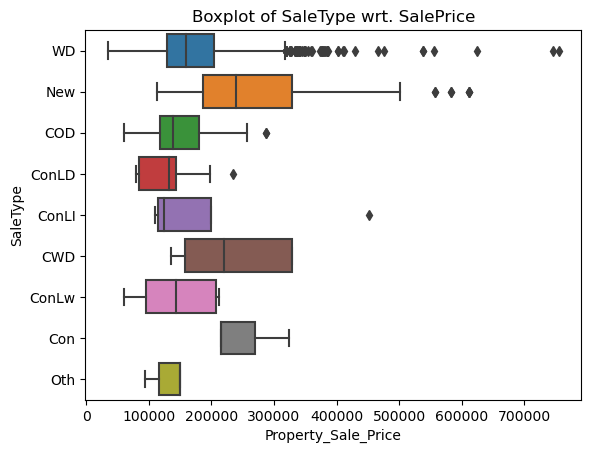

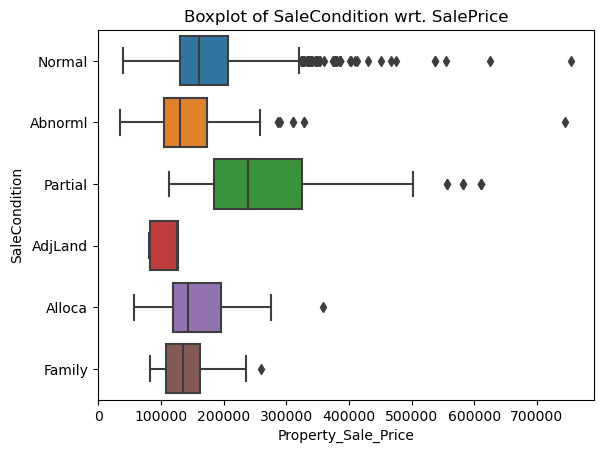

In [176]:
for i in cat_cols:
    sns.boxplot(y=df[i],x=df['Property_Sale_Price'])
    plt.title(f'Boxplot of {i} wrt. SalePrice')
    plt.show()

### Correlation
Represents the direction and magnitude of linear relationship between a pair of variables

Corr can be compared in 2 ways:<br>
1) Amongst indepdent features.<br>
If High corr exists, then we consider dropping one of the highly corr feature<br>
2) Corr of Target var wrt an dependent feature.

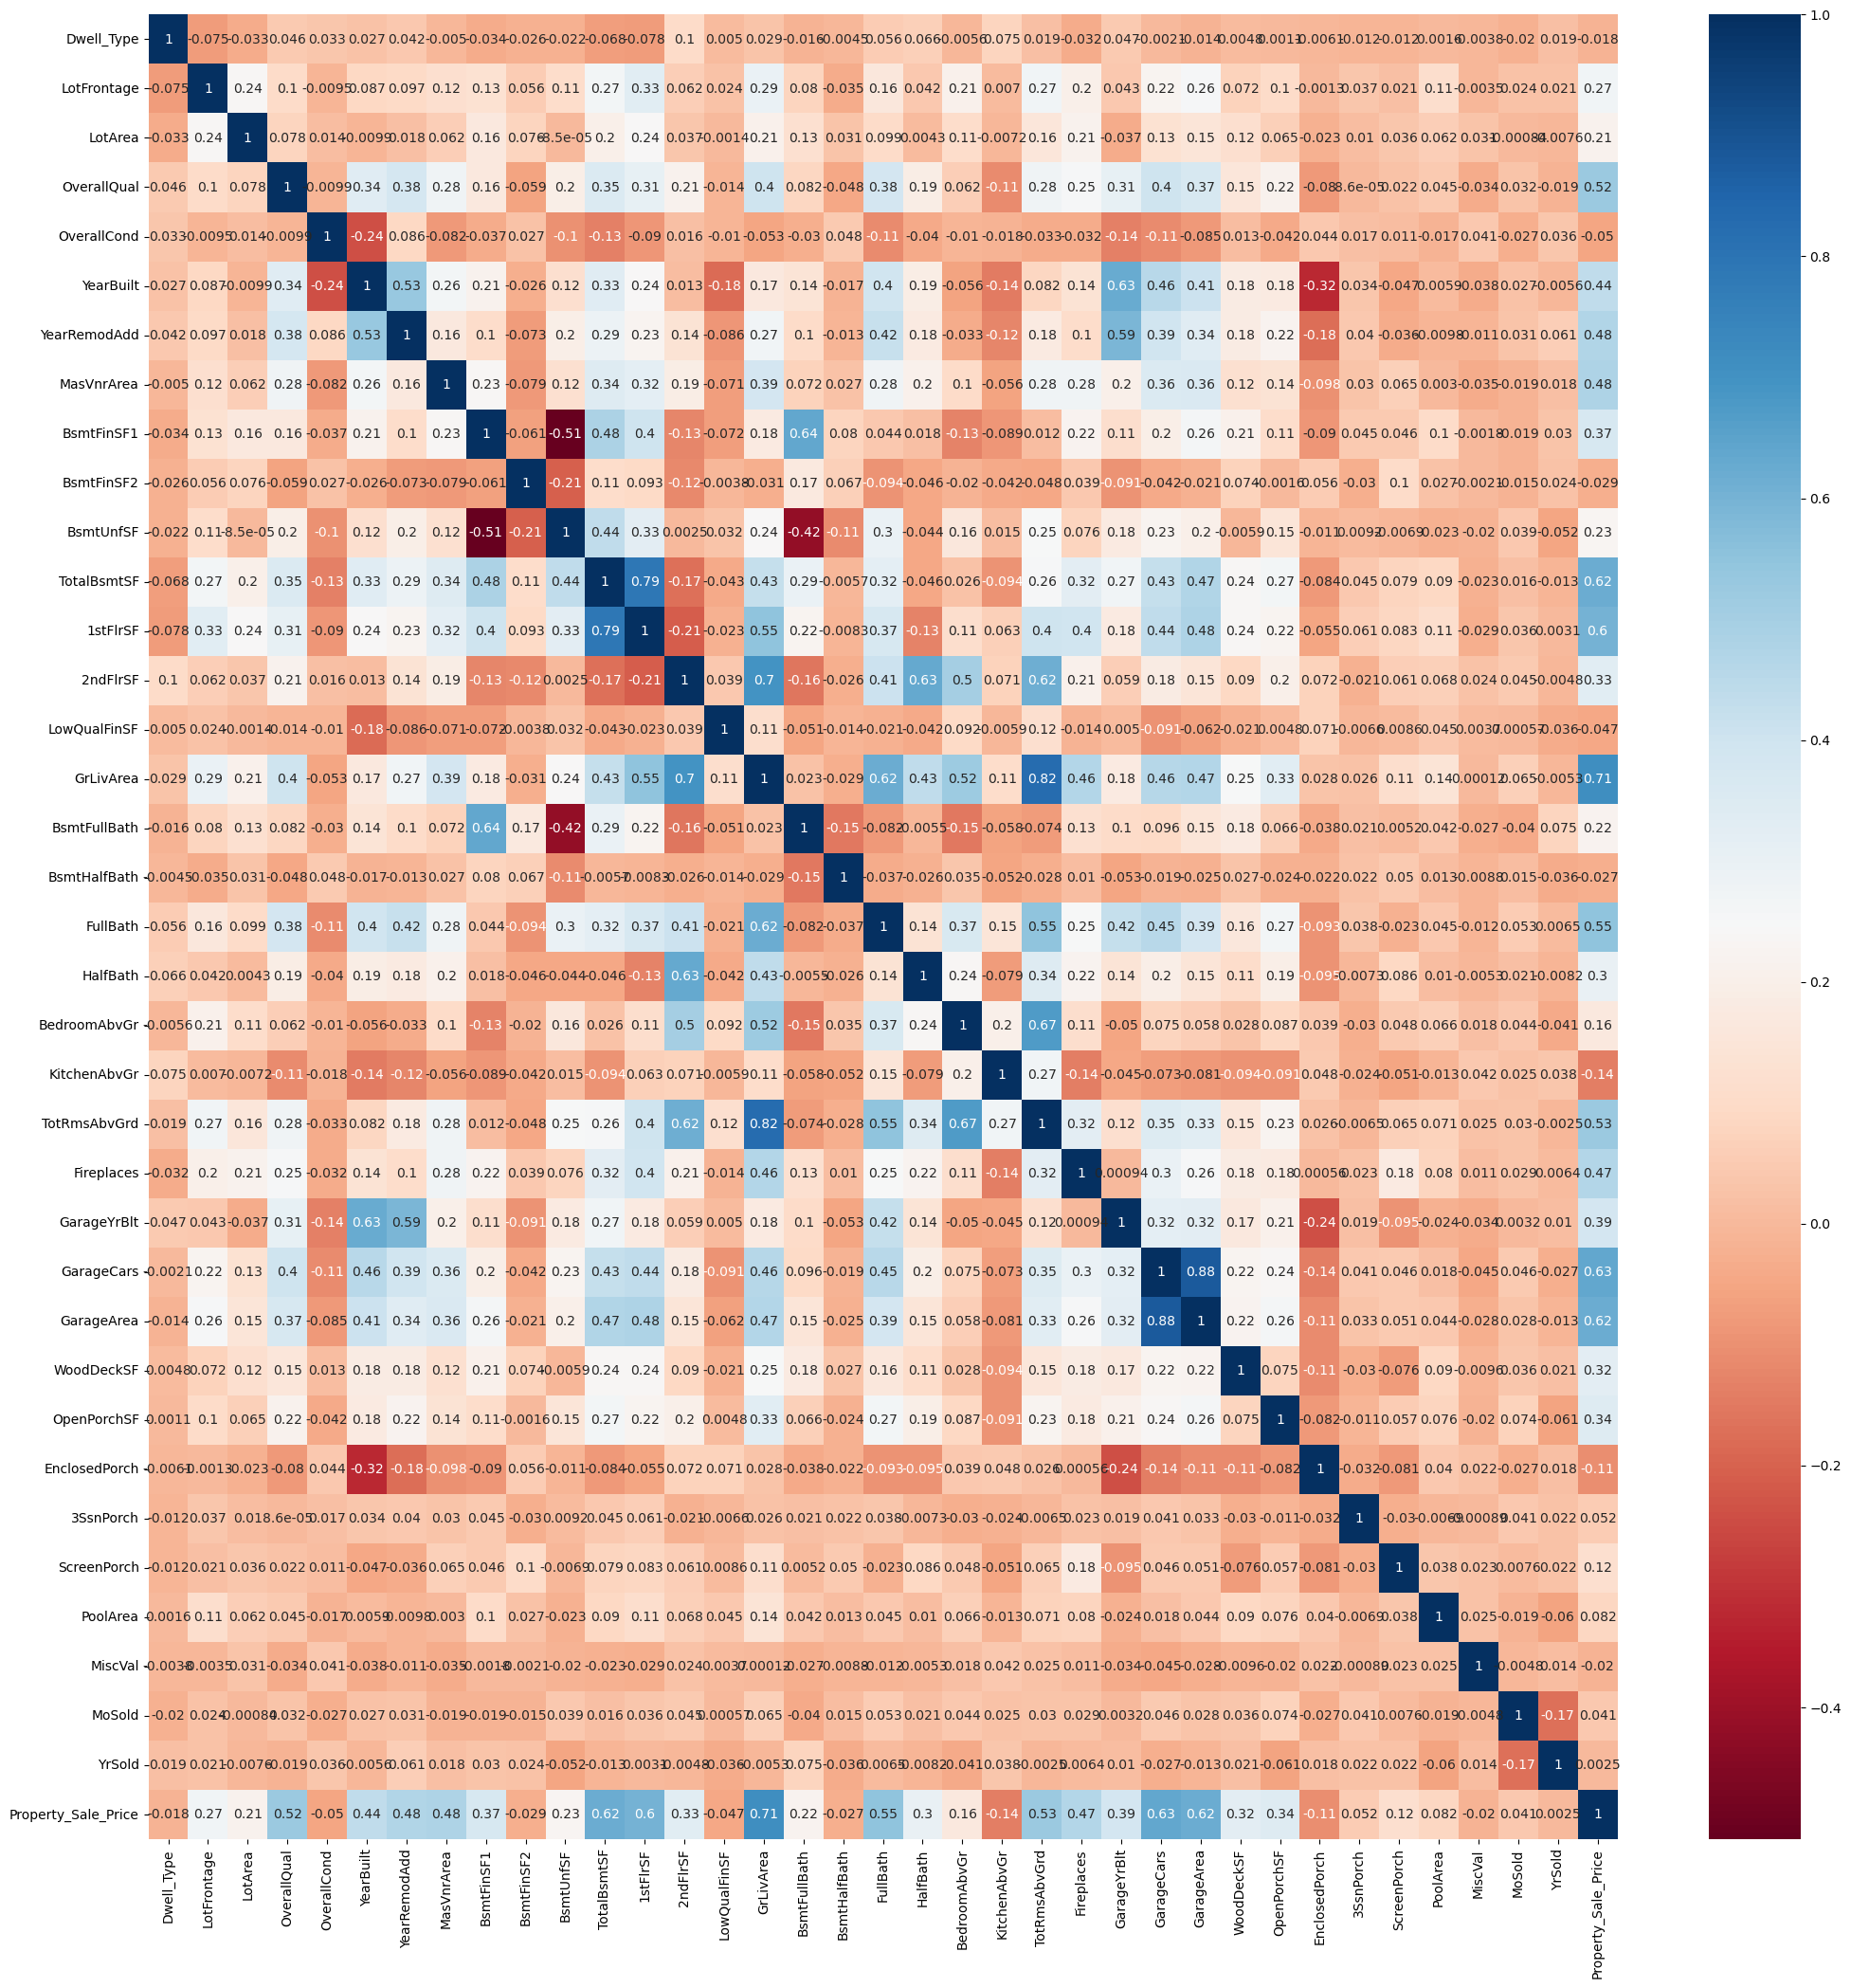

In [177]:
corr = df.corr()  # df.iloc[:,:-1].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu') # annot=annotation=True, cmap = a particular color combination
plt.show()

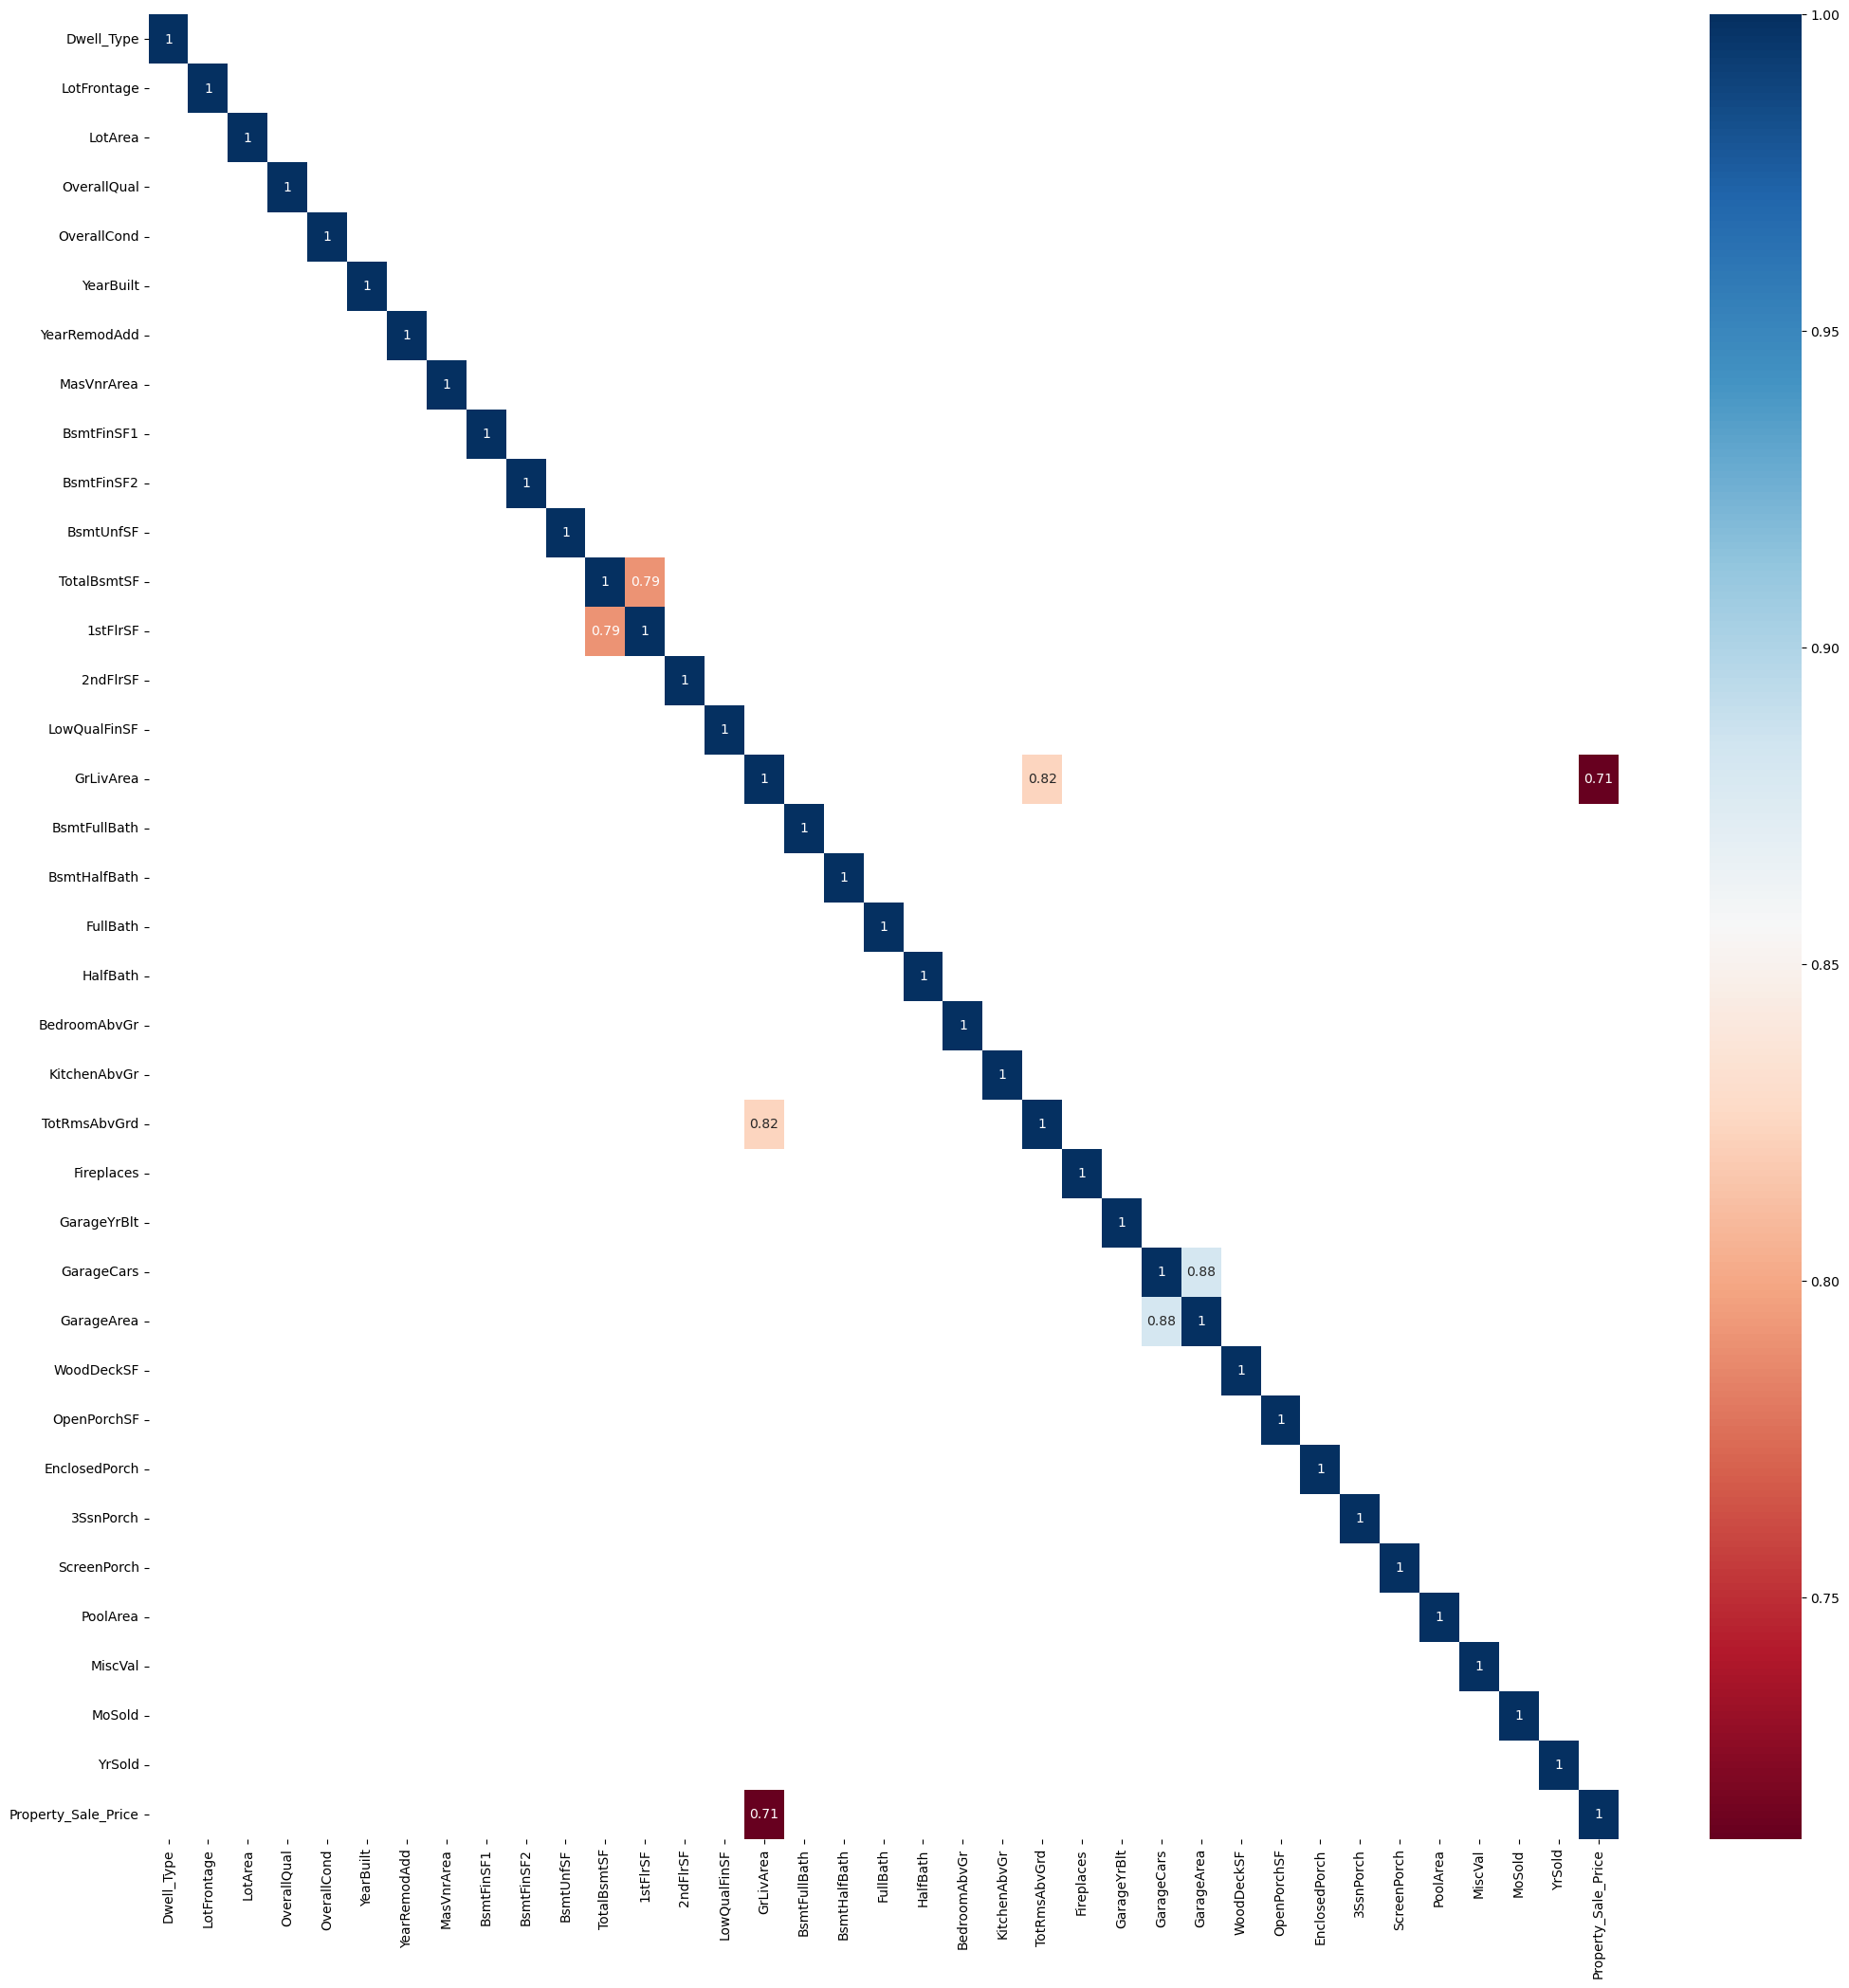

In [178]:
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7], annot=True, cmap='RdBu')
# annot=annotation=True, cmap = a particular color combination
plt.show()

In [179]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

#### Inference
1) GarageCars and GarageArea have high correlation with corr=0.88<br>
2) TotalBsmtSF and 1stFlrSF have high correlation with corr=0.79<br>
3) GrLivArea and TotRmsAbvGrd have high correlation with corr=0.82<br>

### Dropping independent features with high correlation

In [180]:
df.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1,inplace=True)
df.shape

(2059, 77)

### Outlier Treatment

In [181]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')


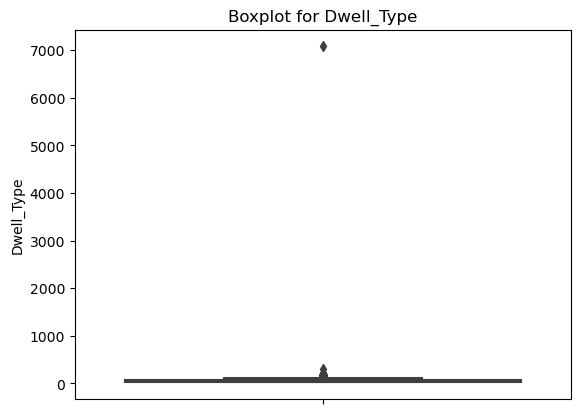

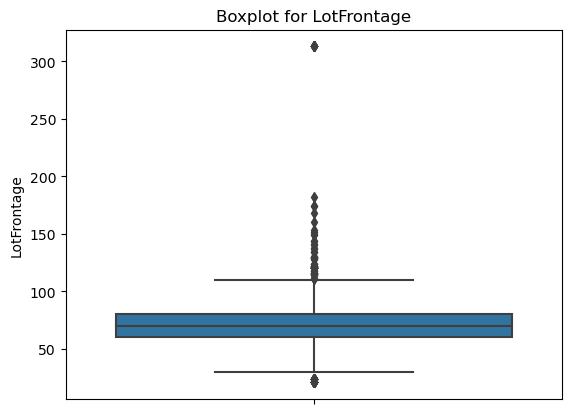

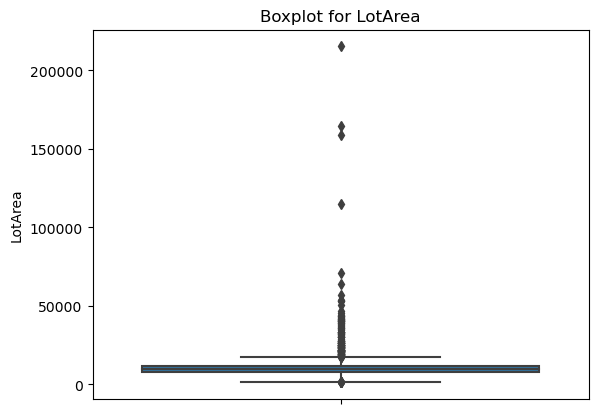

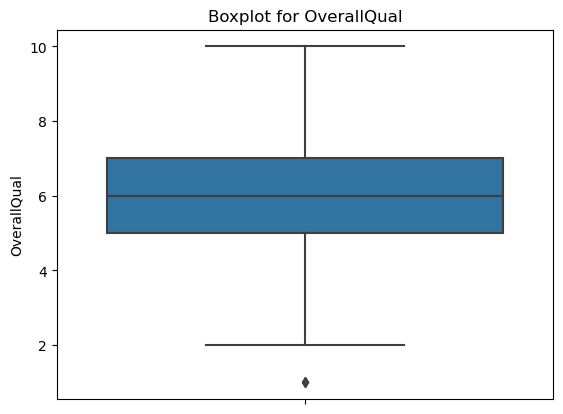

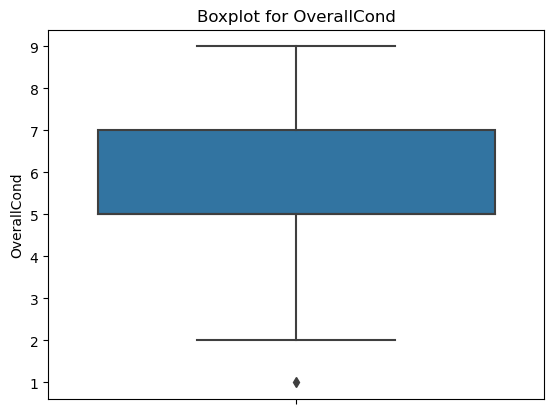

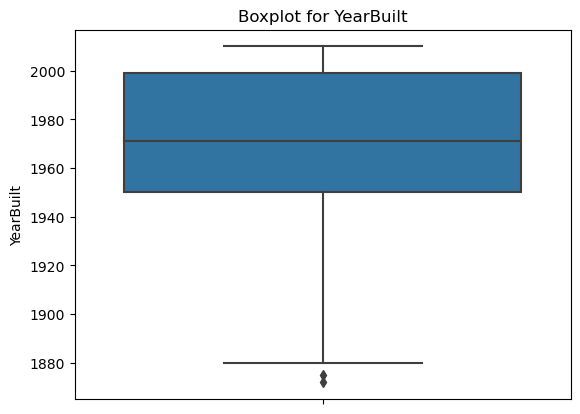

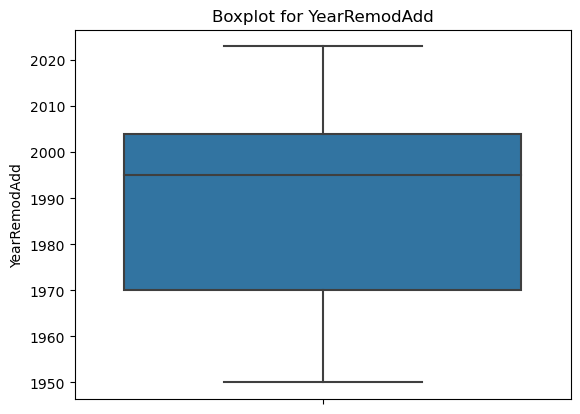

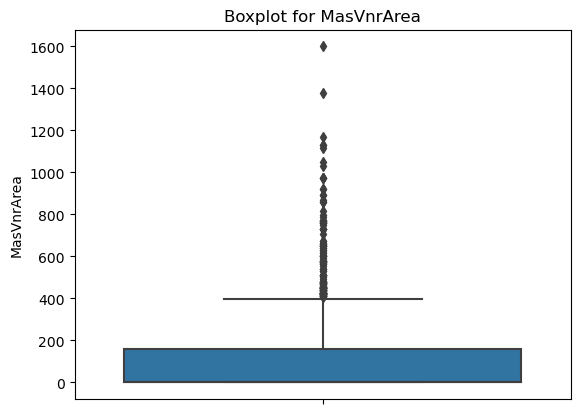

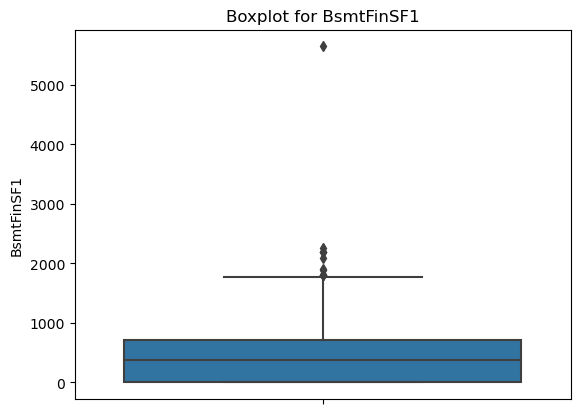

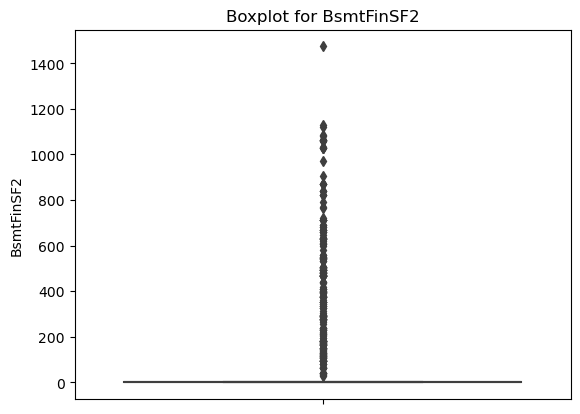

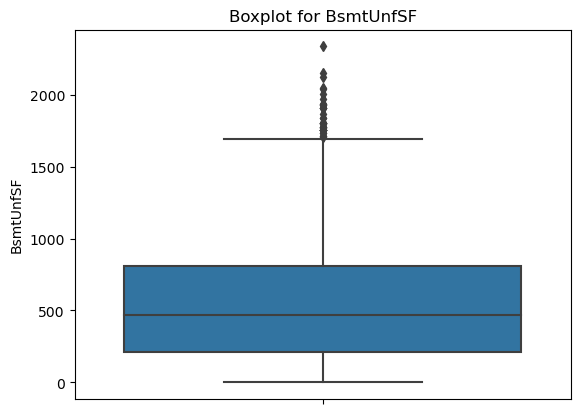

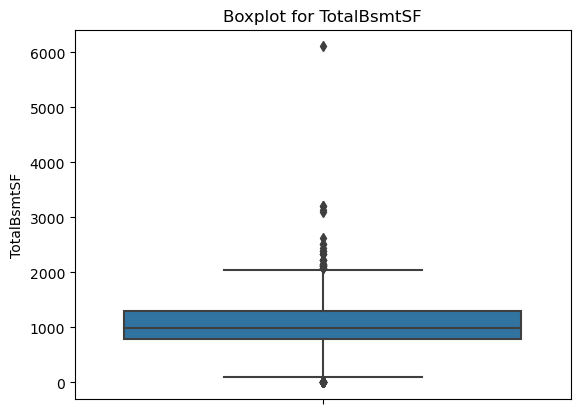

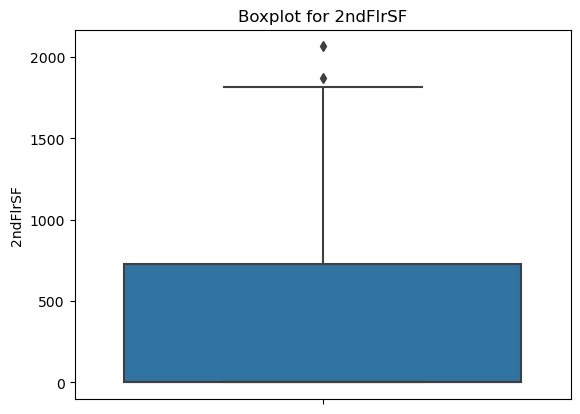

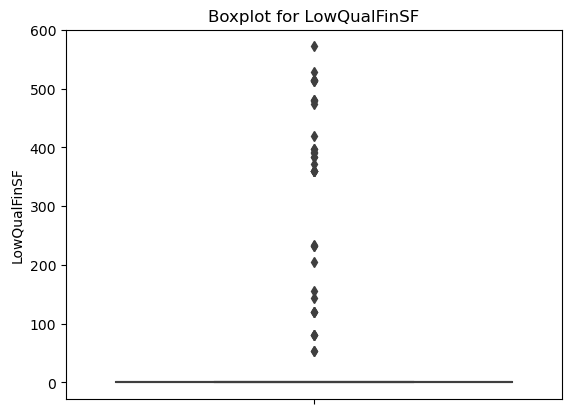

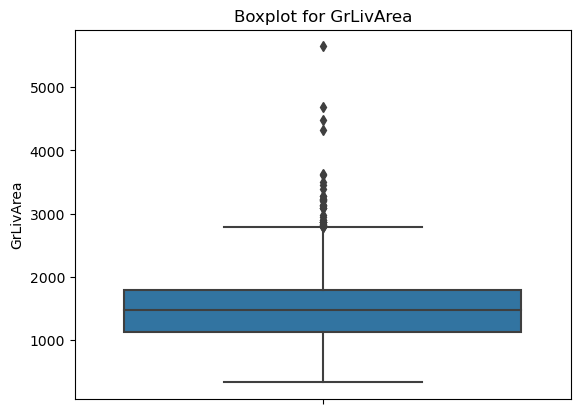

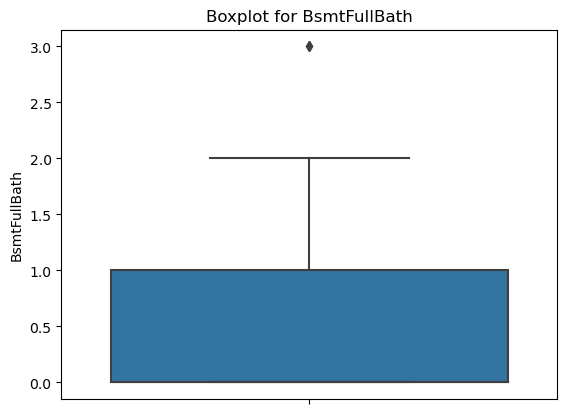

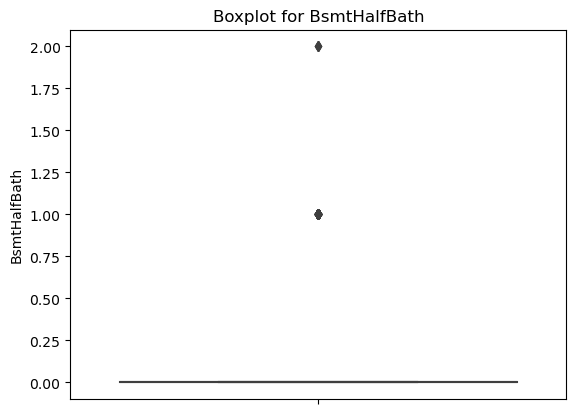

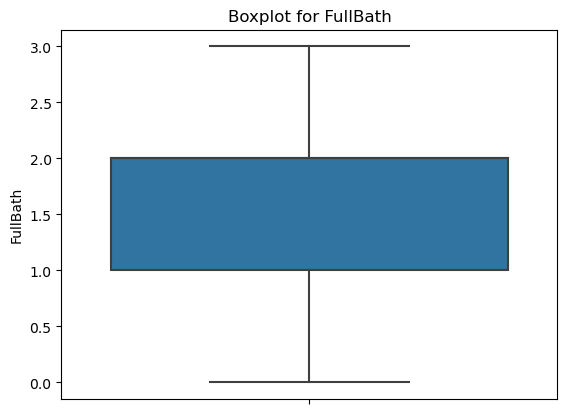

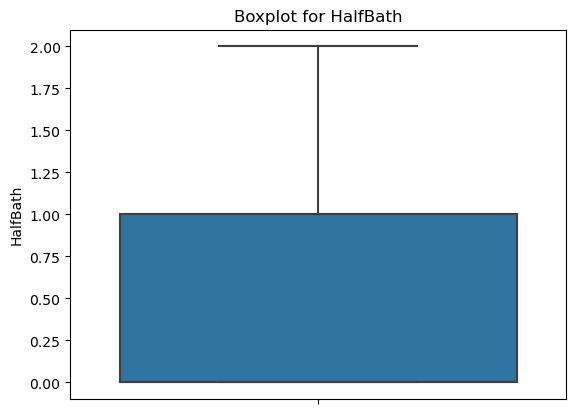

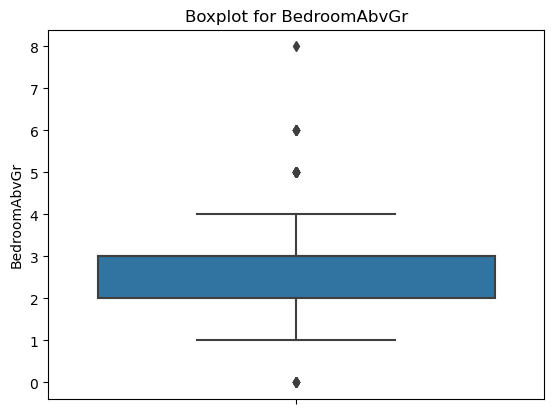

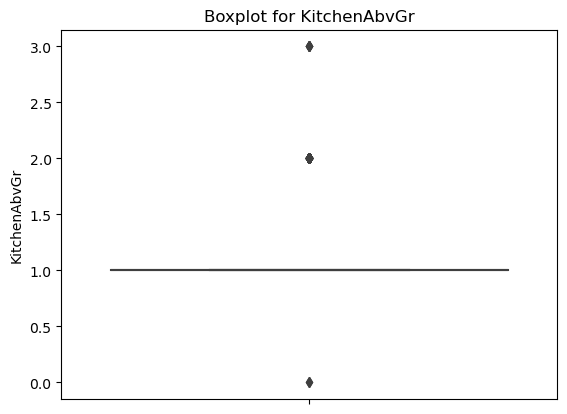

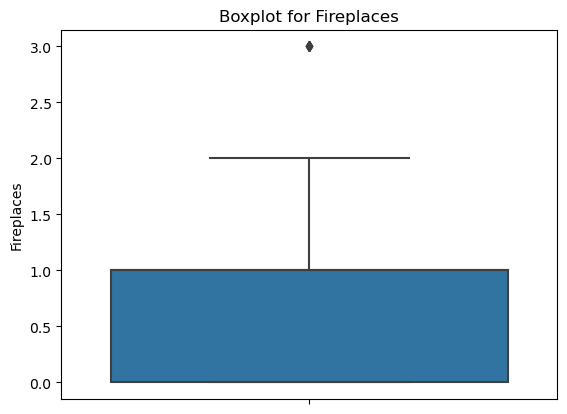

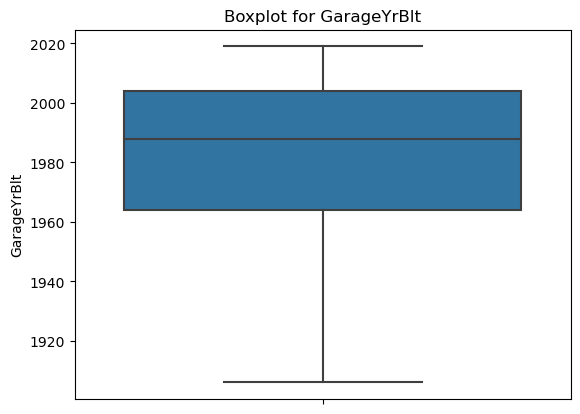

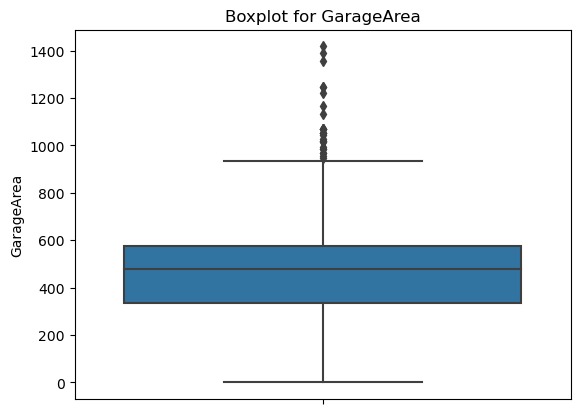

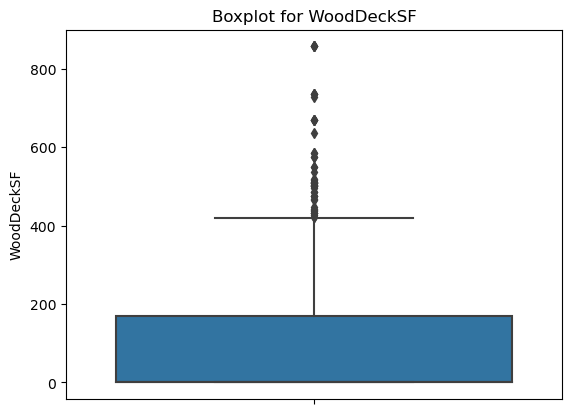

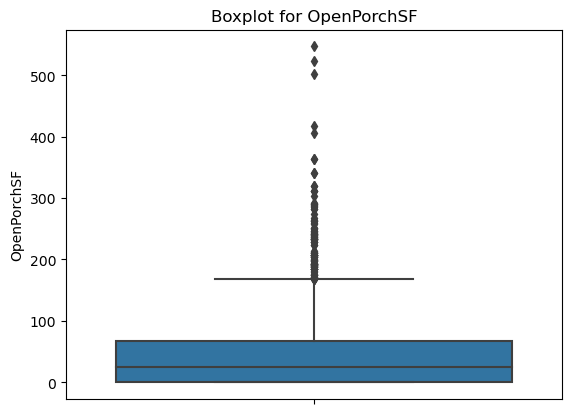

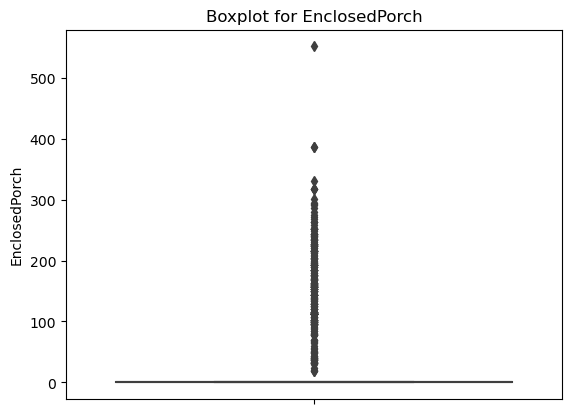

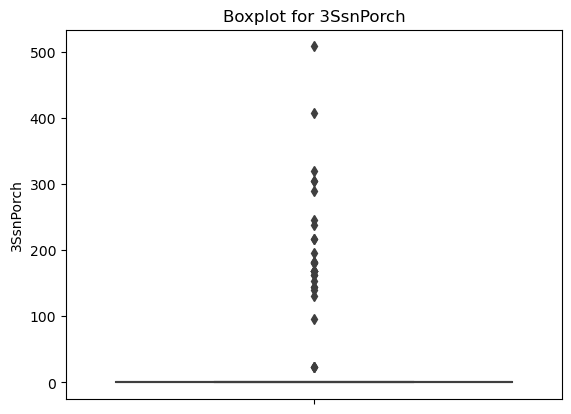

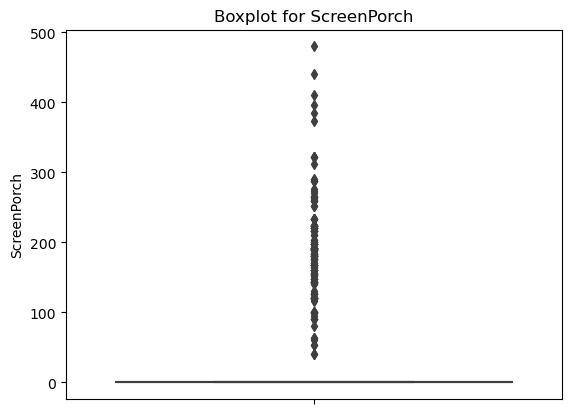

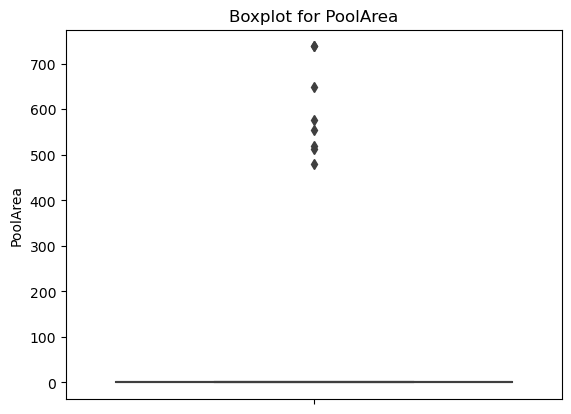

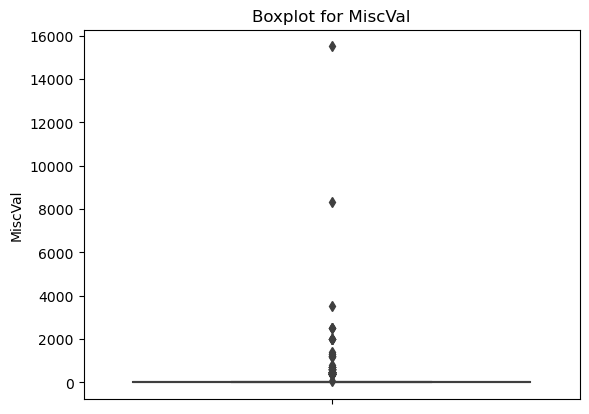

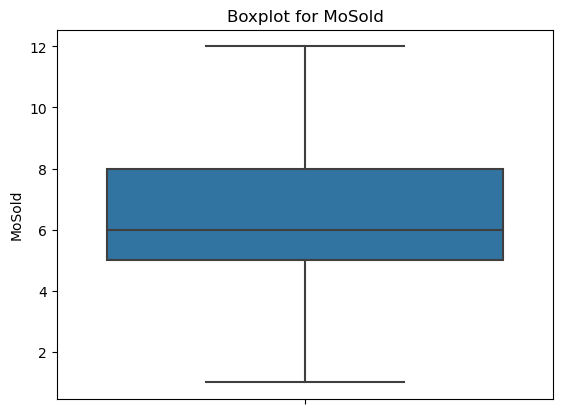

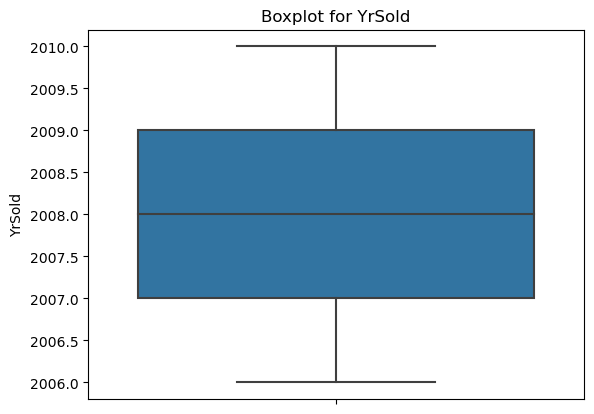

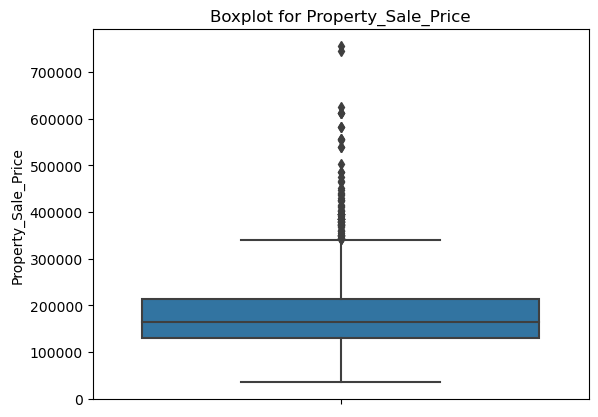

In [182]:
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [183]:
# T = transpose
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

count           mean           std      min        1%  \
Dwell_Type           2059.0      60.569694    160.434497     20.0     20.00   
LotFrontage          2059.0      71.735794     25.752506     21.0     21.00   
LotArea              2059.0   10731.351627   9241.752913   1300.0   1881.18   
OverallQual          2059.0       6.238465      1.519218      1.0      3.00   
OverallCond          2059.0       5.837300      1.363215      1.0      3.00   
YearBuilt            2059.0    1969.382710     30.236792   1872.0   1900.00   
YearRemodAdd         2059.0    1986.652258     20.405665   1950.0   1950.00   
MasVnrArea           2059.0     101.585236    179.131049      0.0      0.00   
BsmtFinSF1           2059.0     438.789218    448.736658      0.0      0.00   
BsmtFinSF2           2059.0      49.413307    166.052884      0.0      0.00   
BsmtUnfSF            2059.0     565.541039    450.581980      0.0      0.00   
TotalBsmtSF          2059.0    1053.743565    431.256522      0.0      0.00   
2ndFlrSF             2059.0     344.339000    438.902516      0.0      0.00   
LowQualFinSF         2059.0       6.210296     49.719612      0.0      0.00   
GrLivArea            2059.0    1517.760563    518.062736    334.0    693.58   
BsmtFullBath         2059.0       0.431277      0.523048      0.0      0.00   
BsmtHalfBath         2059.0       0.056824      0.237774      0.0      0.00   
FullBath             2059.0       1.571151      0.546357      0.0      1.00   
HalfBath             2059.0       0.378339      0.499890      0.0      0.00   
BedroomAbvGr         2059.0       2.872268      0.816320      0.0      1.00   
KitchenAbvGr         2059.0       1.051481      0.235918      0.0      1.00   
Fireplaces           2059.0       0.605148      0.634291      0.0      0.00   
GarageYrBlt          2059.0    1981.778048     24.126041   1906.0   1920.00   
GarageArea           2059.0     474.869354    212.562232      0.0      0.00   
WoodDeckSF           2059.0      94.608062    129.324869      0.0      0.00   
OpenPorchSF          2059.0      46.136474     64.779594      0.0      0.00   
EnclosedPorch        2059.0      21.038854     59.633750      0.0      0.00   
3SsnPorch            2059.0       2.999514     26.907149      0.0      0.00   
ScreenPorch          2059.0      14.593006     54.221189      0.0      0.00   
PoolArea             2059.0       2.314716     37.537581      0.0      0.00   
MiscVal              2059.0      39.705682    431.077716      0.0      0.00   
MoSold               2059.0       6.288975      2.692272      1.0      1.00   
YrSold               2059.0    2007.851384      1.328561   2006.0   2006.00   
Property_Sale_Price  2059.0  181165.997572  78857.481713  34900.0  64500.00   

                           2%        3%       5%       50%       max  
Dwell_Type              20.00     20.00     20.0      50.0    7080.0  
LotFrontage             24.00     32.00     36.0      70.0     313.0  
LotArea               2268.00   2645.00   3675.0    9497.0  215245.0  
OverallQual              4.00      4.00      4.0       6.0      10.0  
OverallCond              4.00      4.00      4.0       5.0       9.0  
YearBuilt             1905.16   1910.00   1916.0    1971.0    2010.0  
YearRemodAdd          1950.00   1950.00   1950.0    1995.0    2023.0  
MasVnrArea               0.00      0.00      0.0       0.0    1600.0  
BsmtFinSF1               0.00      0.00      0.0     383.0    5644.0  
BsmtFinSF2               0.00      0.00      0.0       0.0    1474.0  
BsmtUnfSF                0.00      0.00      0.0     466.0    2336.0  
TotalBsmtSF              0.00    264.00    483.0     990.0    6110.0  
2ndFlrSF                 0.00      0.00      0.0       0.0    2065.0  
LowQualFinSF             0.00      0.00      0.0       0.0     572.0  
GrLivArea              768.00    803.74    848.0    1470.0    5642.0  
BsmtFullBath             0.00      0.00      0.0       0.0       3.0  
BsmtHalfBath             0.00      0.00      0.0 

In [184]:
df.describe(percentiles=[0.90,0.95,0.96,0.97,0.98,0.99]).T

count           mean           std      min       50%  \
Dwell_Type           2059.0      60.569694    160.434497     20.0      50.0   
LotFrontage          2059.0      71.735794     25.752506     21.0      70.0   
LotArea              2059.0   10731.351627   9241.752913   1300.0    9497.0   
OverallQual          2059.0       6.238465      1.519218      1.0       6.0   
OverallCond          2059.0       5.837300      1.363215      1.0       5.0   
YearBuilt            2059.0    1969.382710     30.236792   1872.0    1971.0   
YearRemodAdd         2059.0    1986.652258     20.405665   1950.0    1995.0   
MasVnrArea           2059.0     101.585236    179.131049      0.0       0.0   
BsmtFinSF1           2059.0     438.789218    448.736658      0.0     383.0   
BsmtFinSF2           2059.0      49.413307    166.052884      0.0       0.0   
BsmtUnfSF            2059.0     565.541039    450.581980      0.0     466.0   
TotalBsmtSF          2059.0    1053.743565    431.256522      0.0     990.0   
2ndFlrSF             2059.0     344.339000    438.902516      0.0       0.0   
LowQualFinSF         2059.0       6.210296     49.719612      0.0       0.0   
GrLivArea            2059.0    1517.760563    518.062736    334.0    1470.0   
BsmtFullBath         2059.0       0.431277      0.523048      0.0       0.0   
BsmtHalfBath         2059.0       0.056824      0.237774      0.0       0.0   
FullBath             2059.0       1.571151      0.546357      0.0       2.0   
HalfBath             2059.0       0.378339      0.499890      0.0       0.0   
BedroomAbvGr         2059.0       2.872268      0.816320      0.0       3.0   
KitchenAbvGr         2059.0       1.051481      0.235918      0.0       1.0   
Fireplaces           2059.0       0.605148      0.634291      0.0       1.0   
GarageYrBlt          2059.0    1981.778048     24.126041   1906.0    1988.0   
GarageArea           2059.0     474.869354    212.562232      0.0     480.0   
WoodDeckSF           2059.0      94.608062    129.324869      0.0       0.0   
OpenPorchSF          2059.0      46.136474     64.779594      0.0      25.0   
EnclosedPorch        2059.0      21.038854     59.633750      0.0       0.0   
3SsnPorch            2059.0       2.999514     26.907149      0.0       0.0   
ScreenPorch          2059.0      14.593006     54.221189      0.0       0.0   
PoolArea             2059.0       2.314716     37.537581      0.0       0.0   
MiscVal              2059.0      39.705682    431.077716      0.0       0.0   
MoSold               2059.0       6.288975      2.692272      1.0       6.0   
YrSold               2059.0    2007.851384      1.328561   2006.0    2008.0   
Property_Sale_Price  2059.0  181165.997572  78857.481713  34900.0  164000.0   

                          90%       95%        96%        97%        98%  \
Dwell_Type              120.0     160.0     160.00     160.00     190.00   
LotFrontage              97.0     107.0     109.00     115.00     121.00   
LotArea               14778.6   20442.3   23158.76   26097.60   32395.16   
OverallQual               8.0       9.0       9.00       9.00       9.00   
OverallCond               8.0       9.0       9.00       9.00       9.00   
YearBuilt              2005.0    2007.0    2007.00    2007.00    2008.00   
YearRemodAdd           2007.0    2008.0    2009.00    2009.00    2011.84   
MasVnrArea              336.0     448.0     480.00     571.52     651.00   
BsmtFinSF1             1056.0    1238.8    1300.00    1352.82    1439.36   
BsmtFinSF2              127.0     465.0     491.00     562.98     670.00   
BsmtUnfSF              1258.0    1494.2    1564.08    1632.00    1694.00   
TotalBsmtSF            1616.0    1753.0    1819.44    1862.08    1945.08   
2ndFlrSF                979.0    1141.1    1180.72    1238.30    1320.00   
LowQualFinSF              0.0       0.0       0.00       0.00       0.00   
GrLivArea              2185.6    2450.0    2526.00    2620.52    2729.68   
BsmtFullBath              1.0       1.0 

In [185]:
lower_end = ['LotArea','TotalBsmtSF','GrLivArea','Property_Sale_Price']
upper_end = ['Dwell_Type','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF','GrLivArea',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
             'PoolArea','MiscVal','Property_Sale_Price']

In [186]:
print(df[df['Property_Sale_Price']<64500.0].shape)  # 1 percentile
print(df[df['Property_Sale_Price']>442629.62].shape) # 99 percentile
print(df[df['Property_Sale_Price']>370154.28].shape)

# 5-95 percentile clip

(20, 77)
(21, 77)
(62, 77)


In [187]:
# df['Property_Sale_Price'] = np.where(df['Property_Sale_Price']>370154.28,370154.28,
#                                      df['Property_Sale_Price'])

In [188]:
def outlier_treatment_le(x):      # le = lower end
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       # ue = upper end
    x = x.clip(upper=x.quantile(0.99))
    return x

In [189]:
df[lower_end] = df[lower_end].apply(outlier_treatment_le)
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [190]:
df.describe(percentiles=[0.90,0.95,0.96,0.97,0.98,0.99]).T

count           mean           std       min       50%  \
Dwell_Type           2059.0      57.168528     42.112825     20.00      50.0   
LotFrontage          2059.0      70.881408     20.299302     21.00      70.0   
LotArea              2059.0   10429.005051   5835.817783   1881.18    9497.0   
OverallQual          2059.0       6.238465      1.519218      1.00       6.0   
OverallCond          2059.0       5.837300      1.363215      1.00       5.0   
YearBuilt            2059.0    1969.382710     30.236792   1872.00    1971.0   
YearRemodAdd         2059.0    1986.652258     20.405665   1950.00    1995.0   
MasVnrArea           2059.0      99.257950    167.368641      0.00       0.0   
BsmtFinSF1           2059.0     434.186411    426.236421      0.00     383.0   
BsmtFinSF2           2059.0      47.559961    155.196636      0.00       0.0   
BsmtUnfSF            2059.0     564.009228    445.912422      0.00     466.0   
TotalBsmtSF          2059.0    1048.345313    405.096583      0.00     990.0   
2ndFlrSF             2059.0     342.700826    434.248891      0.00       0.0   
LowQualFinSF         2059.0       5.298203     41.237661      0.00       0.0   
GrLivArea            2059.0    1513.862156    494.277498    693.58    1470.0   
BsmtFullBath         2059.0       0.431277      0.523048      0.00       0.0   
BsmtHalfBath         2059.0       0.056824      0.237774      0.00       0.0   
FullBath             2059.0       1.571151      0.546357      0.00       2.0   
HalfBath             2059.0       0.378339      0.499890      0.00       0.0   
BedroomAbvGr         2059.0       2.872268      0.816320      0.00       3.0   
KitchenAbvGr         2059.0       1.051481      0.235918      0.00       1.0   
Fireplaces           2059.0       0.605148      0.634291      0.00       1.0   
GarageYrBlt          2059.0    1981.778048     24.126041   1906.00    1988.0   
GarageArea           2059.0     473.421486    208.134451      0.00     480.0   
WoodDeckSF           2059.0      93.017309    122.479222      0.00       0.0   
OpenPorchSF          2059.0      45.422759     61.186453      0.00      25.0   
EnclosedPorch        2059.0      20.473842     56.735630      0.00       0.0   
3SsnPorch            2059.0       2.260767     18.737506      0.00       0.0   
ScreenPorch          2059.0      13.956999     50.451310      0.00       0.0   
PoolArea             2059.0       0.000000      0.000000      0.00       0.0   
MiscVal              2059.0      19.768820    104.381528      0.00       0.0   
MoSold               2059.0       6.288975      2.692272      1.00       6.0   
YrSold               2059.0    2007.851384      1.328561   2006.00    2008.0   
Property_Sale_Price  2059.0  180181.279757  73340.589663  64500.00  164000.0   

                          90%       95%        96%        97%        98%  \
Dwell_Type              120.0     160.0     160.00     160.00     190.00   
LotFrontage              97.0     107.0     109.00     115.00     121.00   
LotArea               14778.6   20442.3   23158.76   26097.60   32395.16   
OverallQual               8.0       9.0       9.00       9.00       9.00   
OverallCond               8.0       9.0       9.00       9.00       9.00   
YearBuilt              2005.0    2007.0    2007.00    2007.00    2008.00   
YearRemodAdd           2007.0    2008.0    2009.00    2009.00    2011.84   
MasVnrArea              336.0     448.0     480.00     571.52     651.00   
BsmtFinSF1             1056.0    1238.8    1300.00    1352.82    1439.36   
BsmtFinSF2              127.0     465.0     491.00     562.98     670.00   
BsmtUnfSF              1258.0    1494.2    1564.08    1632.00    1694.00   
TotalBsmtSF            1616.0    1753.0    1819.44    1862.08    1945.08   
2ndFlrSF                979.0    1141.1    1180.72    1238.30    1320.00   
LowQualFinSF              0.0       0.0       0.00       0.00       0.00   
GrLivArea              2185.6    2450.0    2526.00    2620.52    2729.68   
BsmtF

#### Check the normality of the target Variable

In [191]:
from scipy.stats import shapiro

In [192]:
# Ho : Data is normally dist (p>0.05)
# H1 : Data is not normally dist (p<=0.05)
test_stat,p = shapiro(df['Property_Sale_Price'])
print('test_stat',test_stat)
print('p',p)

test_stat 0.910859227180481
p 3.845865969611232e-33


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


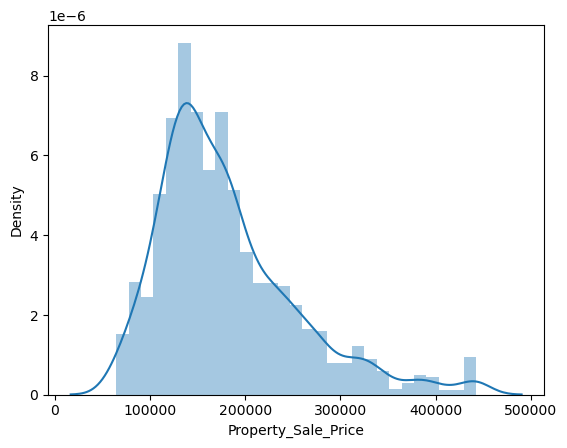

In [193]:
sns.distplot(df['Property_Sale_Price'])
plt.show()

In [194]:
test_stat,p = shapiro(np.log(df['Property_Sale_Price']))
print('test_stat',test_stat)
print('p',p)

test_stat 0.9929962754249573
p 2.4040314627882253e-08


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


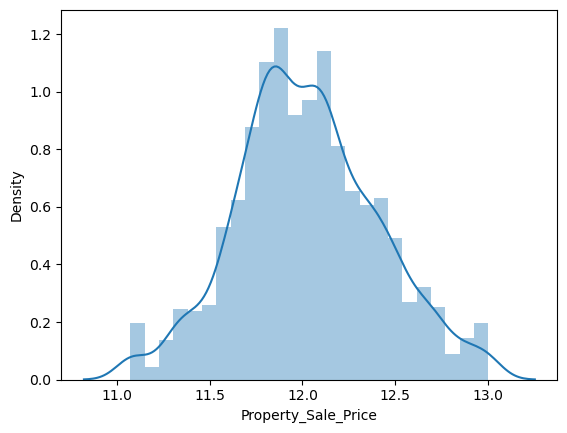

In [195]:
# sns.displot()
sns.distplot(np.log(df['Property_Sale_Price']))
plt.show()

In [196]:
#### Box-Cox method, Yee Johnson method

### Encoding categorical Columns
1) LabelEncoding<br>
2) get_dummies - OneHotEncoding<br>

In [197]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [198]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [199]:
df2 = df.copy()

In [200]:
df['Zone_Class'].value_counts()

RL         1601
RM          323
FV          100
RH           21
C (all)      14
Name: Zone_Class, dtype: int64

In [201]:
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [202]:
df['Zone_Class'].value_counts()

3    1601
4     323
1     100
2      21
0      14
Name: Zone_Class, dtype: int64

In [203]:
df.dtypes.value_counts()

int32      43
float64    21
int64      13
dtype: int64

### Select the Dependent and Independent Features

In [204]:
x = df.drop('Property_Sale_Price',axis=1)
y = np.log(df['Property_Sale_Price'])
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2059, 76)
(2059,)


### Split the data into train and test

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1441, 76)
(618, 76)
(1441,)
(618,)


#### Createing Function to evalute the model performance

In [207]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [208]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))  # Train R2 Score
    print('Test Score',model.score(x_test,y_test))     # Test R2 Score

### Model Building

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)  #

LinearRegression()

In [211]:
mscore(lr1)
# Slightly Overfit

Train Score 0.9009954980843975
Test Score 0.872592048372911


In [212]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.0969906352062471
MSE 0.019731936315095667
RMSE 0.14047041081699616
R2 Score 0.872592048372911


In [213]:
ypred_exp_lr1 = np.exp(ypred_lr1)

In [214]:
res_lr1 = pd.DataFrame({'Actual_test_Price':np.exp(y_test),
                        'Predicted_Test_Price':ypred_exp_lr1})
res_lr1.head(10)

Actual_test_Price  Predicted_Test_Price
1298          160000.00         690905.941386
591           442629.62         415819.469588
1318          275000.00         242698.659965
1067          167900.00         168397.787817
29             68500.00          72227.371362
1058          335000.00         342893.398268
712           189000.00         188403.436432
453           210000.00         192259.759434
1647          143750.00         124882.922483
757           158900.00         137080.980692

In [215]:
x_train.shape

(1441, 76)

In [216]:
print(x_train.columns)

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 

In [217]:
#### Prediction Line
# Sales = m1*Dwell_Type + m2*Zone_Class + ... + m76*SaleCondition + c

In [218]:
coef = lr1.coef_
intercept = lr1.intercept_
print(len(coef),coef)  # coef
print(intercept)  # c

76 [ 1.01122991e-04 -1.80311673e-02  3.32642989e-05  1.17776345e-06
  1.98091294e-01  6.60428176e-02 -6.85628557e-03 -5.85466158e-03
 -8.21981957e-02 -5.76427223e-04  1.80224707e-02  9.17122309e-04
  2.45647074e-03 -4.41056700e-02 -1.39067359e-02  1.71281984e-03
  8.47873133e-03  1.35310828e-02  4.94901740e-04  1.10224406e-03
 -1.09398295e-03  9.23987242e-03 -6.97347010e-03  6.47428951e-03
  8.67932552e-03  2.41148682e-05 -2.57016301e-02  1.18642952e-02
  1.65337123e-02 -1.79948887e-02  4.90603189e-03 -6.75122887e-03
 -7.21553375e-04 -2.27127270e-04  1.26662583e-03 -2.54159117e-04
 -2.82358097e-04  4.03880606e-04 -2.13619084e-02 -1.42215176e-02
  7.54601663e-02  9.28442109e-03 -3.23735482e-05 -4.23094573e-04
  3.01631418e-04  2.61224365e-02  6.24692557e-03  2.74266712e-02
  1.79843003e-02  3.84665985e-03 -9.71764976e-02 -3.39462662e-02
  2.79942072e-02  4.22912634e-02 -8.17172825e-03 -7.09235614e-03
 -3.66480055e-04 -9.74208723e-03  1.63634924e-04  5.66100715e-03
  1.75535517e-02  3.31

### Cross Validation

In [219]:
from sklearn.model_selection import cross_val_score

In [220]:
model_lr  = LinearRegression()
cv_res = cross_val_score(model_lr,x,y,scoring='r2',cv=5)  # cv = number of splits
print(cv_res)  # we will get 5 different R2 scores for 5 differnet splits
print(cv_res.mean())

[0.90146157 0.86657986 0.88452643 0.84215481 0.85835395]
0.8706153220864609


### Saving the Model

In [221]:
import pickle

In [222]:
pickle.dump(lr1,open('5Mar_house_price_model.pkl','wb'))  # wb = write binary

In [223]:
mar5_model = pickle.load(open('5Mar_house_price_model.pkl','rb'))  # rb = read binary

# mar5_model.predict(x_test)

### One Hot Encoding

In [224]:
df2.dtypes.value_counts()

object     43
float64    21
int64      13
dtype: int64

In [225]:
cat_cols = df2.dtypes[df2.dtypes=='object'].index
print(cat_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [226]:
df_dummy = pd.get_dummies(df2,columns=cat_cols,drop_first=True)
print(type(df_dummy))
df_dummy.shape

<class 'pandas.core.frame.DataFrame'>


(2059, 257)

In [227]:
df_dummy.columns[:50]

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price', 'Zone_Class_FV',
       'Zone_Class_RH', 'Zone_Class_RL', 'Zone_Class_RM', 'Road_Type_Pave',
       'Alley_None', 'Alley_Pave', 'Property_Shape_IR2', 'Property_Shape_IR3',
       'Property_Shape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2'],
      dtype='object')

In [228]:
x2 = df_dummy.drop('Property_Sale_Price',axis=1)
y2 = np.log(df_dummy['Property_Sale_Price'])
print(type(x2))
print(type(y2))
print(x2.shape)
print(y2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2059, 256)
(2059,)


In [229]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.30,random_state=42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1441, 256)
(618, 256)
(1441,)
(618,)


In [230]:
lr2 = LinearRegression()
lr2.fit(x_train2,y_train2)

LinearRegression()

In [231]:
print('Train Score',lr2.score(x_train2,y_train2))  # Train R2 Score
print('Test Score',lr2.score(x_test2,y_test2))     # Test R2 Score

Train Score 0.9429749309650957
Test Score 0.8828999322594598


In [232]:
ypred_lr2 = lr2.predict(x_test2)
eval_model(y_test2,ypred_lr2)

MAE 0.08600800930913303
MSE 0.018135532748479205
RMSE 0.13466823214284504
R2 Score 0.8828999322594598


In [233]:
ypred_exp_lr2 = np.exp(ypred_lr2)

In [234]:
coef2 = lr2.coef_
intercept2 = lr2.intercept_
print(len(coef2),coef2)  # coef
print(intercept2)  # c

256 [ 4.38182494e-05 -7.49928768e-05  1.00145818e-06  3.70898450e-03
  9.56567430e-03  2.68845661e-04  9.67007016e-04 -1.00019403e-05
 -1.05425141e-04 -1.49479161e-04 -1.63970275e-04  2.75032411e-04
 -9.79316698e-06 -3.28775336e-04  2.55350327e-04  1.28043531e-02
 -1.38533178e-02  9.35737928e-03  2.10566004e-02  4.32397342e-03
 -9.54739342e-02  1.37753864e-02 -6.36608673e-04  1.91279672e-04
  9.76816252e-05  2.20575591e-04  1.31400037e-04  2.26495506e-04
  2.08854694e-04 -2.19618074e-12  1.22074343e-04  6.83481307e-04
  1.85558362e-03  2.16147428e-01  2.84473122e-01  2.26285661e-01
  2.25374636e-01  1.92976323e-01  2.26350794e-02  9.05843709e-02
  3.76479477e-02  9.13516408e-02  1.79128350e-03  2.03917709e-02
 -3.60450667e-03  2.18478088e-02 -2.29905856e-01  1.10521486e-02
 -4.49312348e-02 -9.53392010e-02 -1.95976053e-02  1.57074211e-02
 -1.93692606e-02 -1.60629966e-01 -1.38777342e-01 -1.50588738e-01
 -4.43476789e-02 -7.67130503e-02  2.72899581e-02 -1.87688510e-01
 -4.75374073e-02 -1.8

### OLS model
1) To identify the coefficients at which the cost function(MSE) is minimum.<br>
2) OLS can alson help in feature selection using p-val<br>
if p-val >0.05 => Feature is not significant.We can exclude these features<br>
if p-val <=0.05 => Feature is significant<br>


In [235]:
import statsmodels.api as sm  # OLS

In [236]:
x3 = x.copy() 
y3 = y.copy()

In [237]:
print(x3.shape)
print(y3.shape)

(2059, 76)
(2059,)


In [238]:
x3 = sm.add_constant(x3)
ols_model = sm.OLS(y3,x3).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.895
Model:                             OLS   Adj. R-squared:                  0.891
Method:                  Least Squares   F-statistic:                     224.2
Date:                 Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                         00:40:53   Log-Likelihood:                 1366.6
No. Observations:                 2059   AIC:                            -2581.
Df Residuals:                     1983   BIC:                            -2153.
Df Model:                           75                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.7715      4.511      3.496      0.000       6.925      24.618
Dwell_Type      9.074e-06      0.000      0.066      0.947      -0.000       0.000
Zone_Class        -0.0167      0.005     -3.250      0.001      -0.027      -0.007
LotFrontage        0.0002      0.000      1.116      0.265      -0.000       0.001
LotArea         6.146e-07   5.66e-07      1.086      0.278   -4.95e-07    1.72e-06
Road_Type          0.2251      0.045      4.998      0.000       0.137       0.313
Alley              0.0557      0.013      4.405      0.000       0.031       0.081
Property_Shape    -0.0073      0.002     -3.290      0.001      -0.012      -0.003
LandContour       -0.0011      0.004     -0.249      0.803      -0.010       0.008
Utilities         -0.0855      0.081     -1.057      0.291      -0.244       0.073
LotConfig         -0.0009      0.002     -0.497      0.619      -0.004       0.003
LandSlope          0.0225      0.012      1.816      0.070      -0.002       0.047
Neighborhood       0.0009      0.001      1.758      0.079      -0.000       0.002
Condition1         0.0064      0.003      1.907      0.057      -0.000       0.013
Condition2        -0.0339      0.012     -2.783      0.005      -0.058      -0.010
Dwelling_Type     -0.0103      0.004     -2.309      0.021      -0.019      -0.002
HouseStyle         0.0019      0.002      0.898      0.369      -0.002       0.006
OverallQual        0.0106      0.002      4.650      0.000       0.006       0.015
OverallCond        0.0138      0.002      5.947      0.000       0.009       0.018
YearBuilt          0.0003      0.000      2.084      0.037    2.01e-05       0.001
YearRemodAdd       0.0012      0.000      5.738      0.000       0.001       0.002
RoofStyle         -0.0010      0.004     -0.258      0.796      -0.008       0.006
RoofMatl           0.0113      0.005      2.265      0.024       0.002       0.021
Exterior1st       -0.0060      0.002     -3.456      0.001      -0.009      -0.003
Exterior2nd        0.0058      0.002      3.722      0.000       0.003       0.009
MasVnrType         0.0075      0.005      1.370      0.171      -0.003       0.018
MasVnrArea      1.725e-05   2.22e-05      0.776      0.438   -2.63e-05    6.08e-05
ExterQual         -0.0282      0.006     -4.384      0.000      -0.041      -0.016
ExterCond          0.0059      0.004      1.391      0.164      -0.002       0.014
Foundation         0.0207      0.005      3.820      0.000       0.010       0.031
BsmtQual          -0.0160      0.003     -4.663      0.000      -0.023      -0.009
BsmtCond           0.0052      0.003      1.592      0.112      -0.001       0.012
BsmtExposure      -0.0092      0.003     -3.140      0.002      -0.015      -0.003
BsmtFinType1      -0.0010      0.002     -0.546      0.585      -0.004       0.002
B

In [239]:
print(ols_model.rsquared)
print(ols_model.rsquared_adj)

0.8945016948732328
0.8905115925613278


In [240]:
print(ols_model.pvalues)

const             4.821412e-04
Dwell_Type        9.472016e-01
Zone_Class        1.175070e-03
LotFrontage       2.645194e-01
LotArea           2.775165e-01
Road_Type         6.304251e-07
Alley             1.114247e-05
Property_Shape    1.020922e-03
LandContour       8.033393e-01
Utilities         2.908132e-01
LotConfig         6.193820e-01
LandSlope         6.950888e-02
Neighborhood      7.887332e-02
Condition1        5.668592e-02
Condition2        5.437159e-03
Dwelling_Type     2.104672e-02
HouseStyle        3.690604e-01
OverallQual       3.541684e-06
OverallCond       3.216871e-09
YearBuilt         3.728097e-02
YearRemodAdd      1.107654e-08
RoofStyle         7.961958e-01
RoofMatl          2.361010e-02
Exterior1st       5.589596e-04
Exterior2nd       2.028814e-04
MasVnrType        1.708138e-01
MasVnrArea        4.377174e-01
ExterQual         1.225427e-05
ExterCond         1.643673e-01
Foundation        1.373266e-04
BsmtQual          3.319690e-06
BsmtCond          1.116344e-01
BsmtExpo

In [241]:
cols = ols_model.pvalues[ols_model.pvalues>=0.6].index
print(cols)

Index(['Dwell_Type', 'LandContour', 'LotConfig', 'RoofStyle', 'BedroomAbvGr'], dtype='object')


In [242]:
x4 = df.drop(['Property_Sale_Price','Dwell_Type', 'LandContour',
              'LotConfig', 'RoofStyle', 'BedroomAbvGr'],axis=1)
y4 = np.log(df['Property_Sale_Price'])
print(x4.shape)
print(y4.shape)

(2059, 71)
(2059,)


In [243]:
x4 = sm.add_constant(x4)
ols_model1 = sm.OLS(y4,x4).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.894
Model:                             OLS   Adj. R-squared:                  0.891
Method:                  Least Squares   F-statistic:                     240.7
Date:                 Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                         00:40:53   Log-Likelihood:                 1366.4
No. Observations:                 2059   AIC:                            -2591.
Df Residuals:                     1988   BIC:                            -2191.
Df Model:                           70                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.8671      4.487      3.536      0.000       7.066      24.668
Zone_Class        -0.0166      0.005     -3.253      0.001      -0.027      -0.007
LotFrontage        0.0002      0.000      1.200      0.230      -0.000       0.001
LotArea         6.482e-07   5.63e-07      1.152      0.249   -4.55e-07    1.75e-06
Road_Type          0.2226      0.045      4.979      0.000       0.135       0.310
Alley              0.0557      0.013      4.427      0.000       0.031       0.080
Property_Shape    -0.0076      0.002     -3.522      0.000      -0.012      -0.003
Utilities         -0.0837      0.081     -1.039      0.299      -0.242       0.074
LandSlope          0.0232      0.012      1.995      0.046       0.000       0.046
Neighborhood       0.0009      0.001      1.783      0.075   -9.34e-05       0.002
Condition1         0.0064      0.003      1.907      0.057      -0.000       0.013
Condition2        -0.0341      0.012     -2.808      0.005      -0.058      -0.010
Dwelling_Type     -0.0102      0.003     -3.465      0.001      -0.016      -0.004
HouseStyle         0.0019      0.002      0.982      0.326      -0.002       0.006
OverallQual        0.0106      0.002      4.654      0.000       0.006       0.015
OverallCond        0.0138      0.002      5.963      0.000       0.009       0.018
YearBuilt          0.0003      0.000      2.080      0.038    1.93e-05       0.001
YearRemodAdd       0.0012      0.000      5.744      0.000       0.001       0.002
RoofMatl           0.0113      0.005      2.288      0.022       0.002       0.021
Exterior1st       -0.0060      0.002     -3.485      0.001      -0.009      -0.003
Exterior2nd        0.0058      0.002      3.757      0.000       0.003       0.009
MasVnrType         0.0076      0.005      1.399      0.162      -0.003       0.018
MasVnrArea       1.67e-05    2.2e-05      0.757      0.449   -2.65e-05    5.99e-05
ExterQual         -0.0279      0.006     -4.373      0.000      -0.040      -0.015
ExterCond          0.0057      0.004      1.368      0.171      -0.002       0.014
Foundation         0.0207      0.005      3.850      0.000       0.010       0.031
BsmtQual          -0.0159      0.003     -4.756      0.000      -0.022      -0.009
BsmtCond           0.0051      0.003      1.583      0.114      -0.001       0.012
BsmtExposure      -0.0093      0.003     -3.199      0.001      -0.015      -0.004
BsmtFinType1      -0.0010      0.002     -0.567      0.571      -0.004       0.002
BsmtFinSF1        -0.0001   5.49e-05     -2.068      0.039      -0.000   -5.85e-06
BsmtFinType2       0.0023      0.004      0.642      0.521      -0.005       0.009
BsmtFinSF2        -0.0001   6.46e-05     -2.314      0.021      -0.000   -2.28e-05
BsmtUnfSF         -0.0002   5.43e-05     -3.072      0.002      -0.000   -6.04e-05
T

In [244]:
print(ols_model1.rsquared)
print(ols_model1.rsquared_adj)
print(ols_model.rsquared_adj)

0.8944782433375523
0.8907626885254943
0.8905115925613278


#### Inference
1) Adjusted R2 has increased on dropping insignificant features